# Exploración profunda del dataset clínico
Este cuaderno realiza un análisis exhaustivo del dataset proporcionado.

In [15]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
df = pd.read_csv('../DataWarehouse/data.csv')
df.head()

sample                                    id  \
0  TCGA-B0-5695-01A  fb9bafa5-7133-4955-8156-4eb6763dc8e1   
1  TCGA-BP-4807-01A  33cf0893-0411-4758-aa90-602bfedf0850   
2  TCGA-BP-4807-11A  33cf0893-0411-4758-aa90-602bfedf0850   
3  TCGA-BP-4995-01A  9245a557-01ea-4446-b9e9-313f6ab18834   
4  TCGA-BP-4995-11A  9245a557-01ea-4446-b9e9-313f6ab18834   

                   disease_type                               case_id  \
0  Adenomas and Adenocarcinomas  fb9bafa5-7133-4955-8156-4eb6763dc8e1   
1  Adenomas and Adenocarcinomas  33cf0893-0411-4758-aa90-602bfedf0850   
2  Adenomas and Adenocarcinomas  33cf0893-0411-4758-aa90-602bfedf0850   
3  Adenomas and Adenocarcinomas  9245a557-01ea-4446-b9e9-313f6ab18834   
4  Adenomas and Adenocarcinomas  9245a557-01ea-4446-b9e9-313f6ab18834   

   submitter_id primary_site alcohol_history.exposures race.demographic  \
0  TCGA-B0-5695       Kidney              Not Reported            white   
1  TCGA-BP-4807       Kidney              Not Reported            white   
2  TCGA-BP-4807       Kidney              Not Reported            white   
3  TCGA-BP-4995       Kidney              Not Reported            white   
4  TCGA-BP-4995       Kidney              Not Reported            white   

  gender.demographic   ethnicity.demographic  ... sample_type_id.samples  \
0             female  not hispanic or latino  ...                      1   
1               male            not reported  ...                      1   
2               male            not reported  ...                     11   
3               male  not hispanic or latino  ...                      1   
4               male  not hispanic or latino  ...                     11   

   tumor_descriptor.samples                     sample_id.samples  \
0                   Primary  86e4862c-7405-40b5-b73f-be0c6c52ea6d   
1                   Primary  26307437-2f30-4647-81ac-f6bae5be6113   
2            Not Applicable  6a8ad307-fada-432d-a223-8d9780c4eccc   
3                   Primary  5cd539b8-90bf-4465-826f-73269ea2e802   
4            Not Applicable  8b6e49fe-5470-476d-9695-0caee2896d66   

   sample_type.samples  preservation_method.samples specimen_type.samples  \
0        Primary Tumor                      Unknown               Unknown   
1        Primary Tumor                      Unknown               Unknown   
2  Solid Tissue Normal                      Unknown          Solid Tissue   
3        Primary Tumor                      Unknown               Unknown   
4  Solid Tissue Normal                      Unknown          Solid Tissue   

  is_ffpe.samples tissue_type.samples tipo_cancer_TCGA tipo_cancer_general  
0           False               Tumor             KIRC               Riñón  
1           False               Tumor             KIRC               Riñón  
2           False              Normal             KIRC               Riñón  
3           False               Tumor             KIRC               Riñón  
4           False              Normal             KIRC               Riñón  

[5 rows x 65 columns]

## Información general del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12797 entries, 0 to 12796
Data columns (total 65 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   sample                                                     12797 non-null  object 
 1   id                                                         12797 non-null  object 
 2   disease_type                                               12797 non-null  object 
 3   case_id                                                    12797 non-null  object 
 4   submitter_id                                               12797 non-null  object 
 5   primary_site                                               12797 non-null  object 
 6   alcohol_history.exposures                                  12797 non-null  object 
 7   race.demographic                                           12797 non-null  object 
 8   gender

## Valores nulos

Missigno hace una visualización gráfica de los valores faltantes en nuestro Data. Es una grilla visual donde:

- Cada columna representa una columna del DataFrame.
- Cada línea horizontal representa una fila del dataset.
- Los bloques blancos indican valores faltantes (NaN).
- Los bloques oscuros indican valores no nulos (datos presentes).
- La barra lateral muestra cuántos valores faltan por fila.

Nos permite ver si los valores faltan de forma aleatoria o estructurada, ayuda a detectar patrones (por ejemplo, si varias columnas fallan juntas) y es más visual e intuitivo que imprimir le número de valores nulos por columna.

Matriz de valores nulos:

<Axes: >

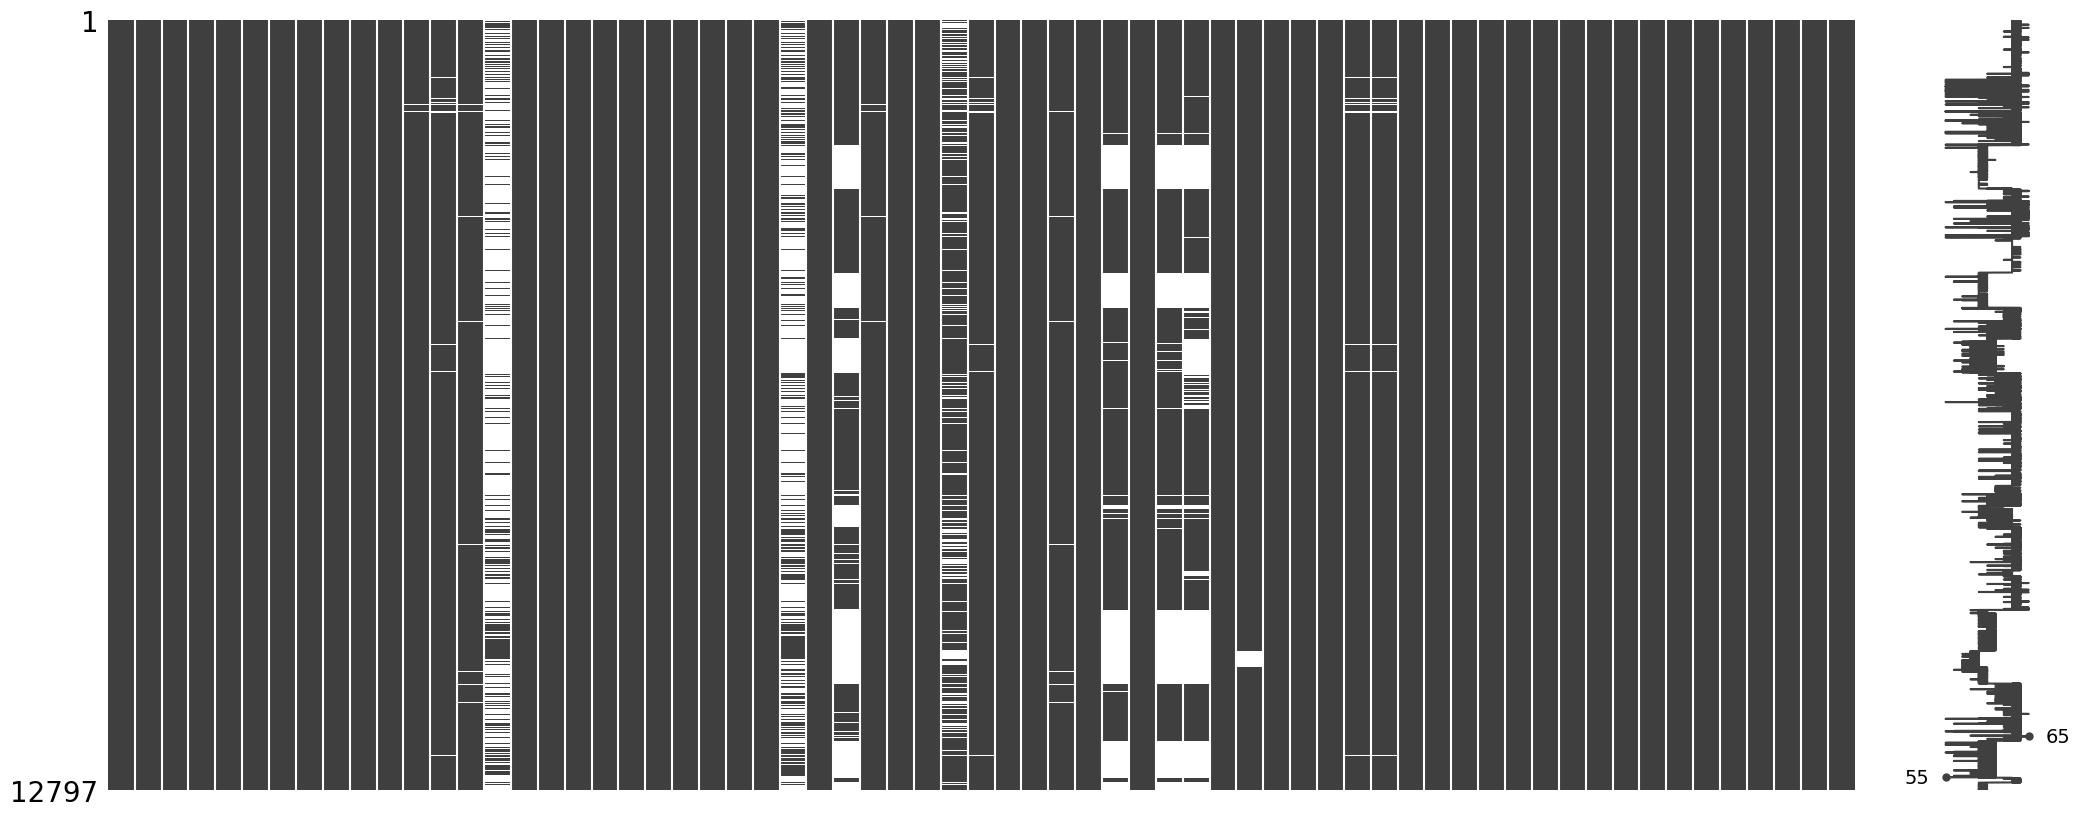

In [4]:
msno.matrix(df)

- Claramente se ve que hay columnas con valores completamente completos (barras negras) y otras con una cantidad notable de valores faltantes.
- Algunas columnas presentan patrones verticales de nulos (es decir, las mismas filas tienen nulos en varias columnas), lo cual sugiere que los datos faltantes no son aleatorios, sino posiblemente condicionales (por ejemplo, en función del tipo de muestra o estado del paciente).
- En conjunto, no parece que la mayoría del dataset esté "perdido", pero hay variables específicas que convendría imputar o eliminar.

Variables destacadas:
- year_of_death.demographic: Los registros que están vacíos es porque están vivos.
- days_to_death.demographic: Días que han pasado entre la fecha de índice y la fecha de muerte.
- ajcc_pathologic_m.diagnoses: Presencia de metástasis.
- ajcc_pathologic_stage.diagnoses: Estado general del tumor.
- ajcc_pathologic_n.diagnoses: Grado de afectación a los ganglios linfáticos.
- ajcc_pathologic_t.diagnoses: Tamaño y extensión del tumor.
- days_to_last_follow_up.diagnoses: Días desde el diagnóstico inicial hasta el último momento en que se tuvo contacto con el paciente (seguimiento clínico).

Tiene sentido porque en cada tipo de datasets hay algunas columnas que faltan.

---

Correlaciones entre valores nulos:

<Axes: >

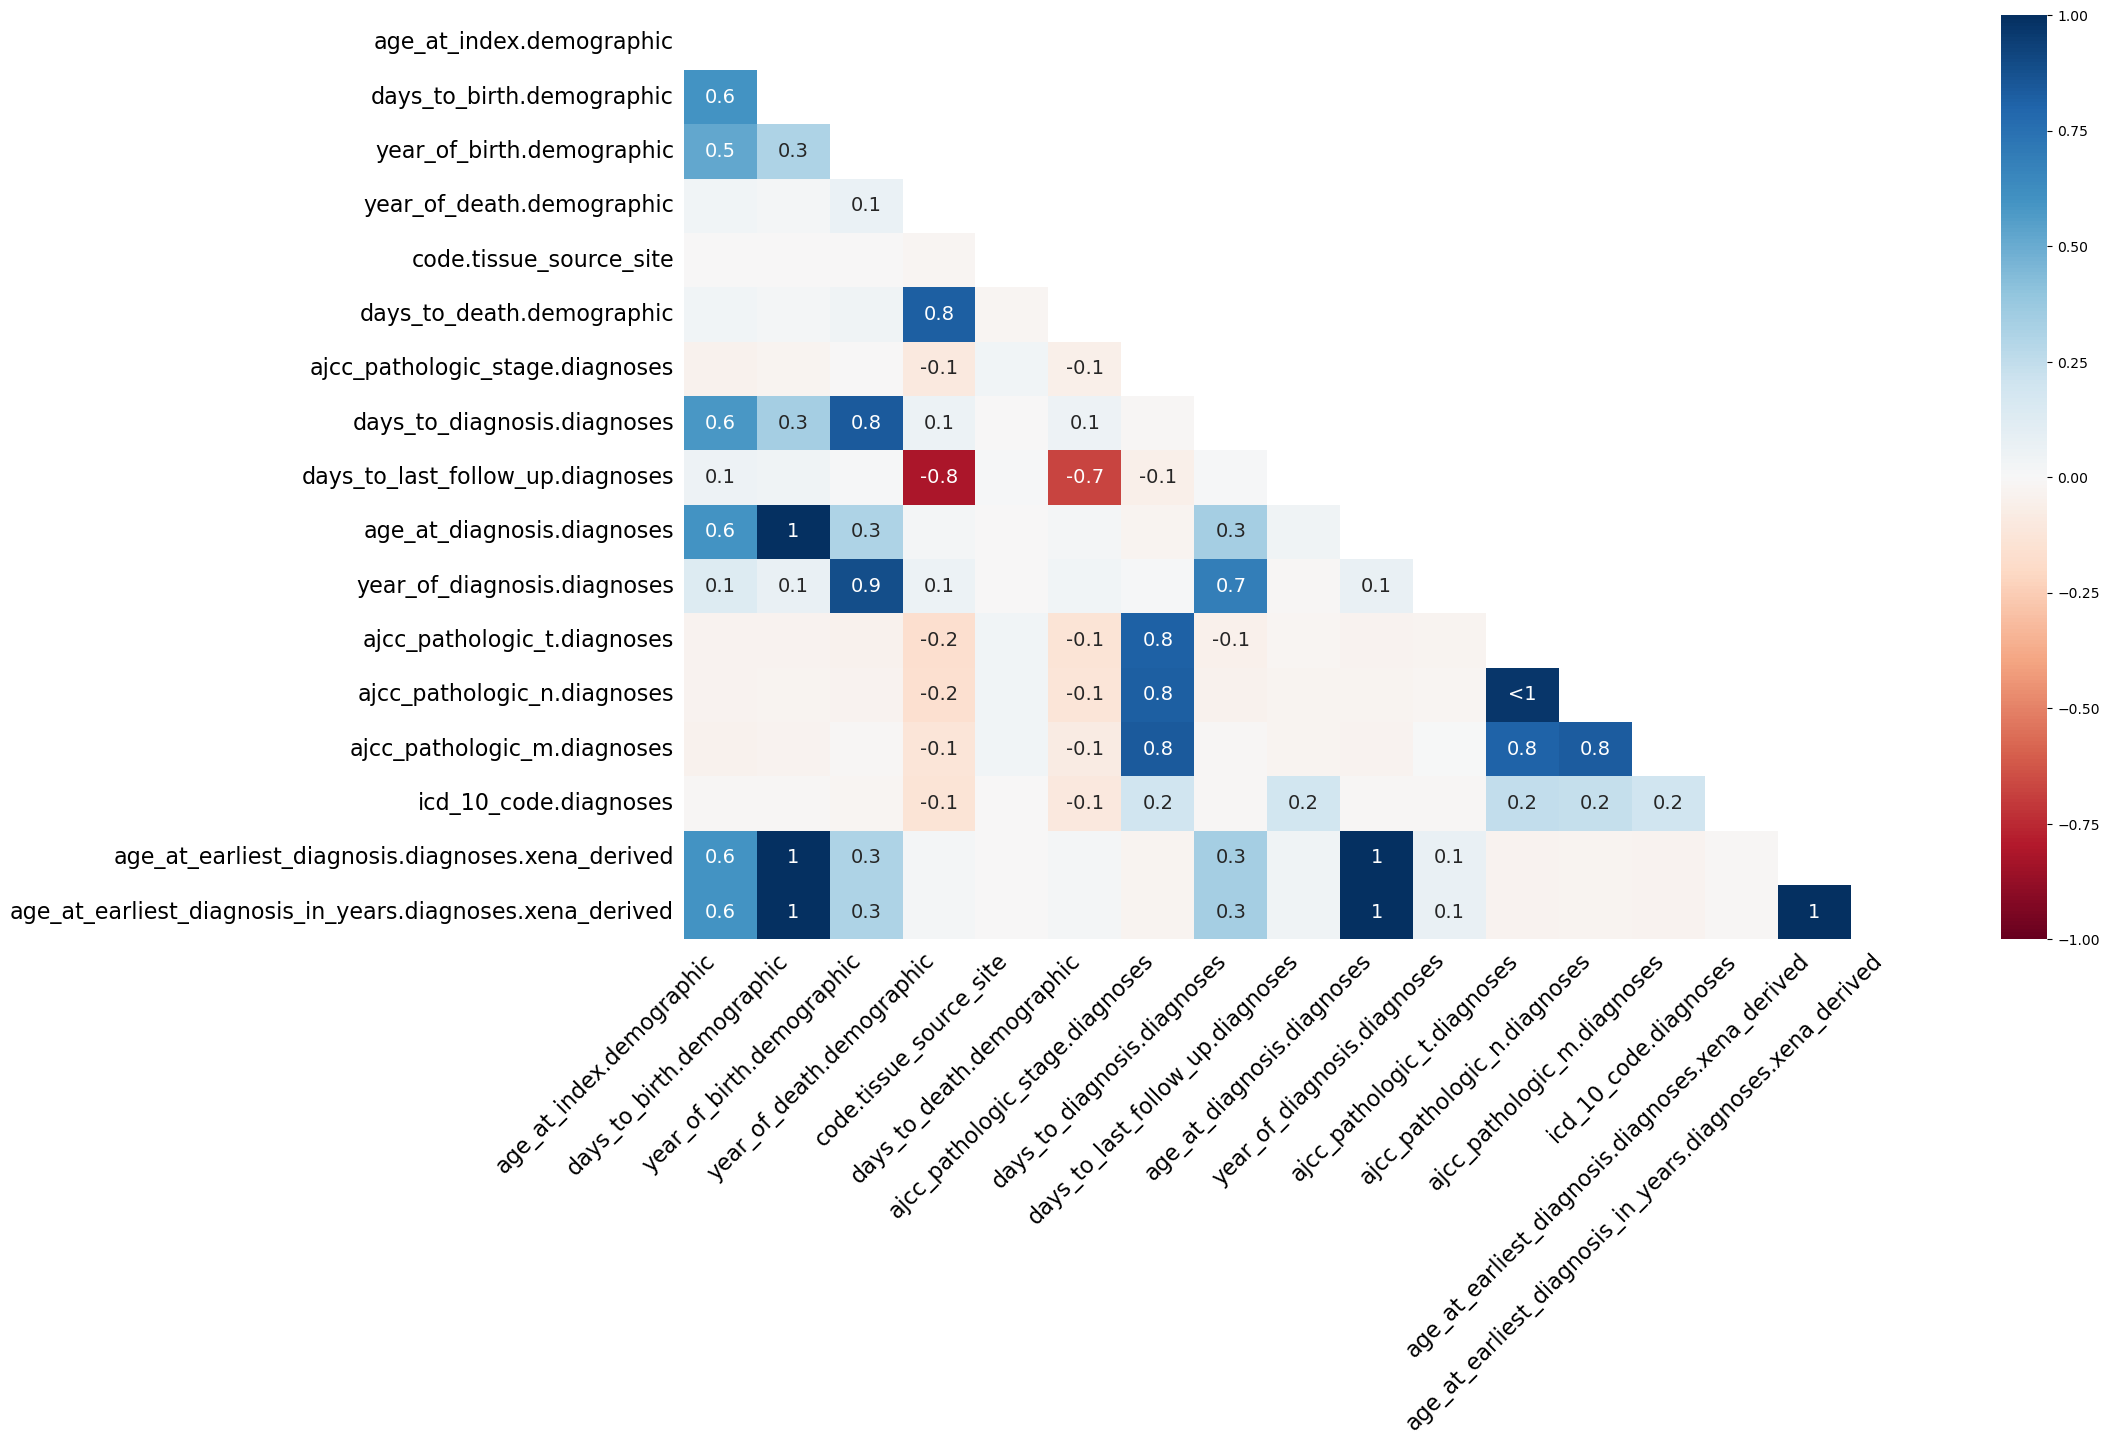

In [5]:
msno.heatmap(df)

### Análisis de Correlación de valores faltantes

#### Variables con Correlación Fuerte (> 0.8 o < -0.8)

`days_to_diagnosis` vs `age_at_diagnosis`: **0.8**
  - Cuanto más tiempo desde el nacimiento hasta el diagnóstico, mayor edad.
  - Podríamos usar solo una.


`days_to_diagnosis` vs `days_to_last_follow_up`: **-0.8**
  - Interesante correlación negativa: diagnóstico más temprano se asocia con mayor tiempo de seguimiento.
  - Podría tener implicaciones clínicas importantes en supervivencia o pronóstico.


`ajcc_pathologic_t`, `n`, `m`: **correlación entre sí ~0.8**
  - Representan el sistema TNM (Tamaño, Ganglios, Metástasis).
  - Tiene sentido que estén correlacionadas. Se recomienda mantenerlas juntas.
  

`age_at_diagnosis` vs `age_at_earliest_diagnosis` y `age_at_earliest_diagnosis_in_years`: **correlación perfecta**
  - Redundancia. Podemos conservar solo una de estas tres variables derivadas.


#### Otras observaciones relevantes

`year_of_diagnosis` vs `year_of_birth`: **~0.7**
  - Relación temporal esperada: los más jóvenes suelen diagnosticarse más recientemente.

`days_to_last_follow_up` muestra correlaciones negativas con varias variables:
  - Sugerencia de que **puede actuar como variable proxy de seguimiento/supervivencia**.
  - Útil en análisis censurados si se combina con `days_to_death` y `vital_status`.


#### Resumen posibles cambios

| Variable | Acción recomendada |
|----------|--------------------|
| `age_at_earliest_diagnosis`, `age_at_earliest_diagnosis_in_years` | Conservar solo una |
| `days_to_last_follow_up` | Usar como proxy de seguimiento |
| `days_to_diagnosis`, `age_at_diagnosis` | Posible simplificación usando solo una |
| `ajcc_pathologic_t/n/m` | Mantener como grupo para análisis de estadio clínico |

Agrupación de columnas con valores similares nulos. Es una visualización tipo “árbol” que agrupa columnas basándose en cómo coinciden sus valores nulos. Si dos columnas tienden a tener nulos en los mismos registros, se agrupan juntas:

<Axes: >

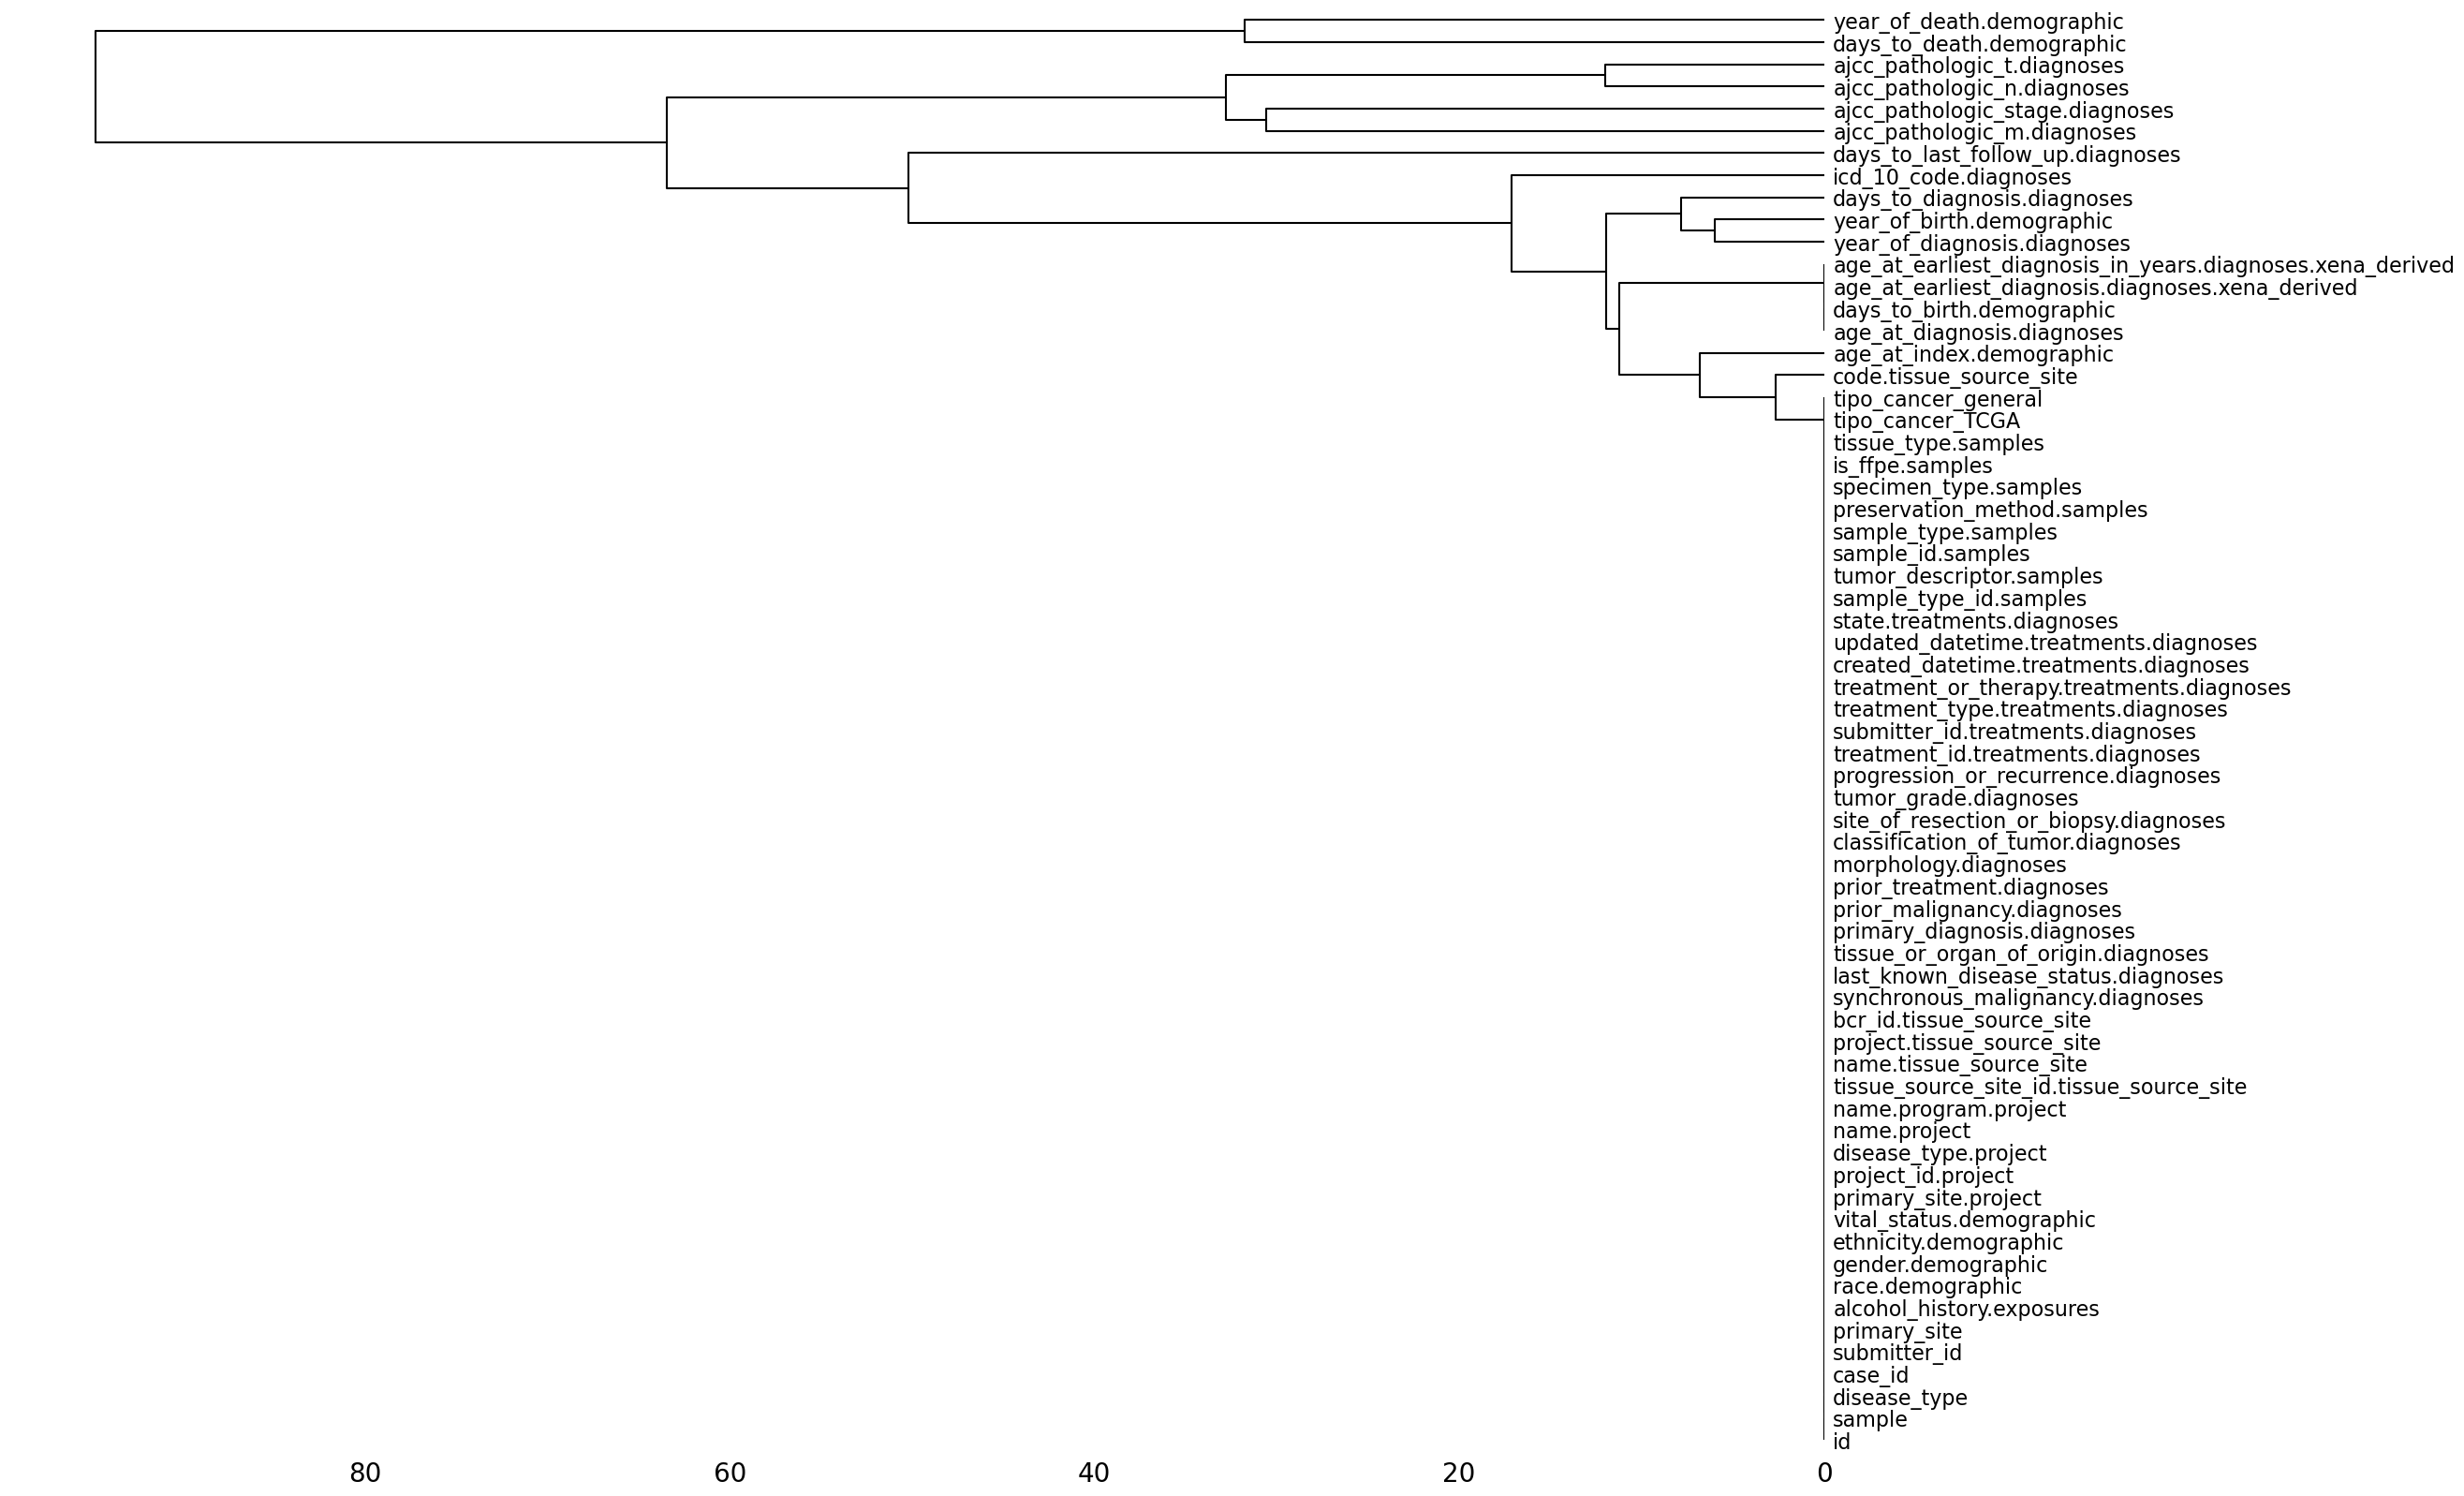

In [19]:
msno.dendrogram(df)

### Análisis por agrupaciones detectadas


##### **GRUPO 1: Variables de supervivencia y seguimiento**
**Columnas:**  
`year_of_death.demographic`, `days_to_death.demographic`, `ajcc_pathologic_t`, `ajcc_pathologic_n`, `ajcc_pathologic_stage`, `ajcc_pathologic_m`, `days_to_last_follow_up.diagnoses`

Estas columnas forman un **bloque clínico** relacionado con seguimiento y estadificación del cáncer.  
Hipótesis: pueden estar ausentes porque **no hay tumor** o **no se realizó la estadificación** (por diagnóstico reciente, falta de biopsia, etc.).

👉 Podrían codificarse como `"no aplica"` si el tipo de cáncer no requiere estadificación.

##### **GRUPO 2: Edad y diagnóstico**
**Columnas:**  
`year_of_diagnosis`, `year_of_birth`, `age_at_diagnosis`, `days_to_birth`, `age_at_earliest_diagnosis`, etc.

Este grupo contiene variables **altamente correlacionadas** y con **muy pocos nulos**.  
Son variables **derivables entre sí** (por ejemplo: `year_of_diagnosis - year_of_birth = age_at_diagnosis`).

##### **GRUPO 3: Muestra y tipo de cáncer**
**Columnas:**  
`tipo_cancer_general`, `tipo_cancer_TCGA`, `sample_type`, `specimen_type`, `tissue_type`, etc.

Estas variables describen el **tipo de cáncer** y las **características de la muestra**. Aparecen **completas o casi completas**.

##### **GRUPO 4: Tratamientos y progresión**
**Columnas:**  
`treatment_id`, `treatment_type`, `updated_datetime`, `progression_or_recurrence`, `tumor_grade`, `classification_of_tumor`, etc.

Este bloque refleja **variables clínicas asociadas a tratamientos y evolución**.  
Faltan juntas posiblemente porque el paciente **no recibió tratamiento** o **aún no se ha registrado**.

##### **GRUPO 5: Diagnóstico previo, metástasis y datos históricos**
**Columnas:**  
`prior_treatment`, `prior_malignancy`, `synchronous_malignancy`, etc.

---

Valores nulos por columnas, gráfico de barras y texto:

year_of_death.demographic                                    9536
days_to_death.demographic                                    8526
ajcc_pathologic_m.diagnoses                                  4536
ajcc_pathologic_stage.diagnoses                              4522
ajcc_pathologic_n.diagnoses                                  3541
ajcc_pathologic_t.diagnoses                                  3479
days_to_last_follow_up.diagnoses                             2515
icd_10_code.diagnoses                                         278
year_of_birth.demographic                                     167
year_of_diagnosis.diagnoses                                   131
age_at_earliest_diagnosis.diagnoses.xena_derived              127
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived     127
age_at_diagnosis.diagnoses                                    127
days_to_birth.demographic                                     127
days_to_diagnosis.diagnoses                                   119
age_at_ind

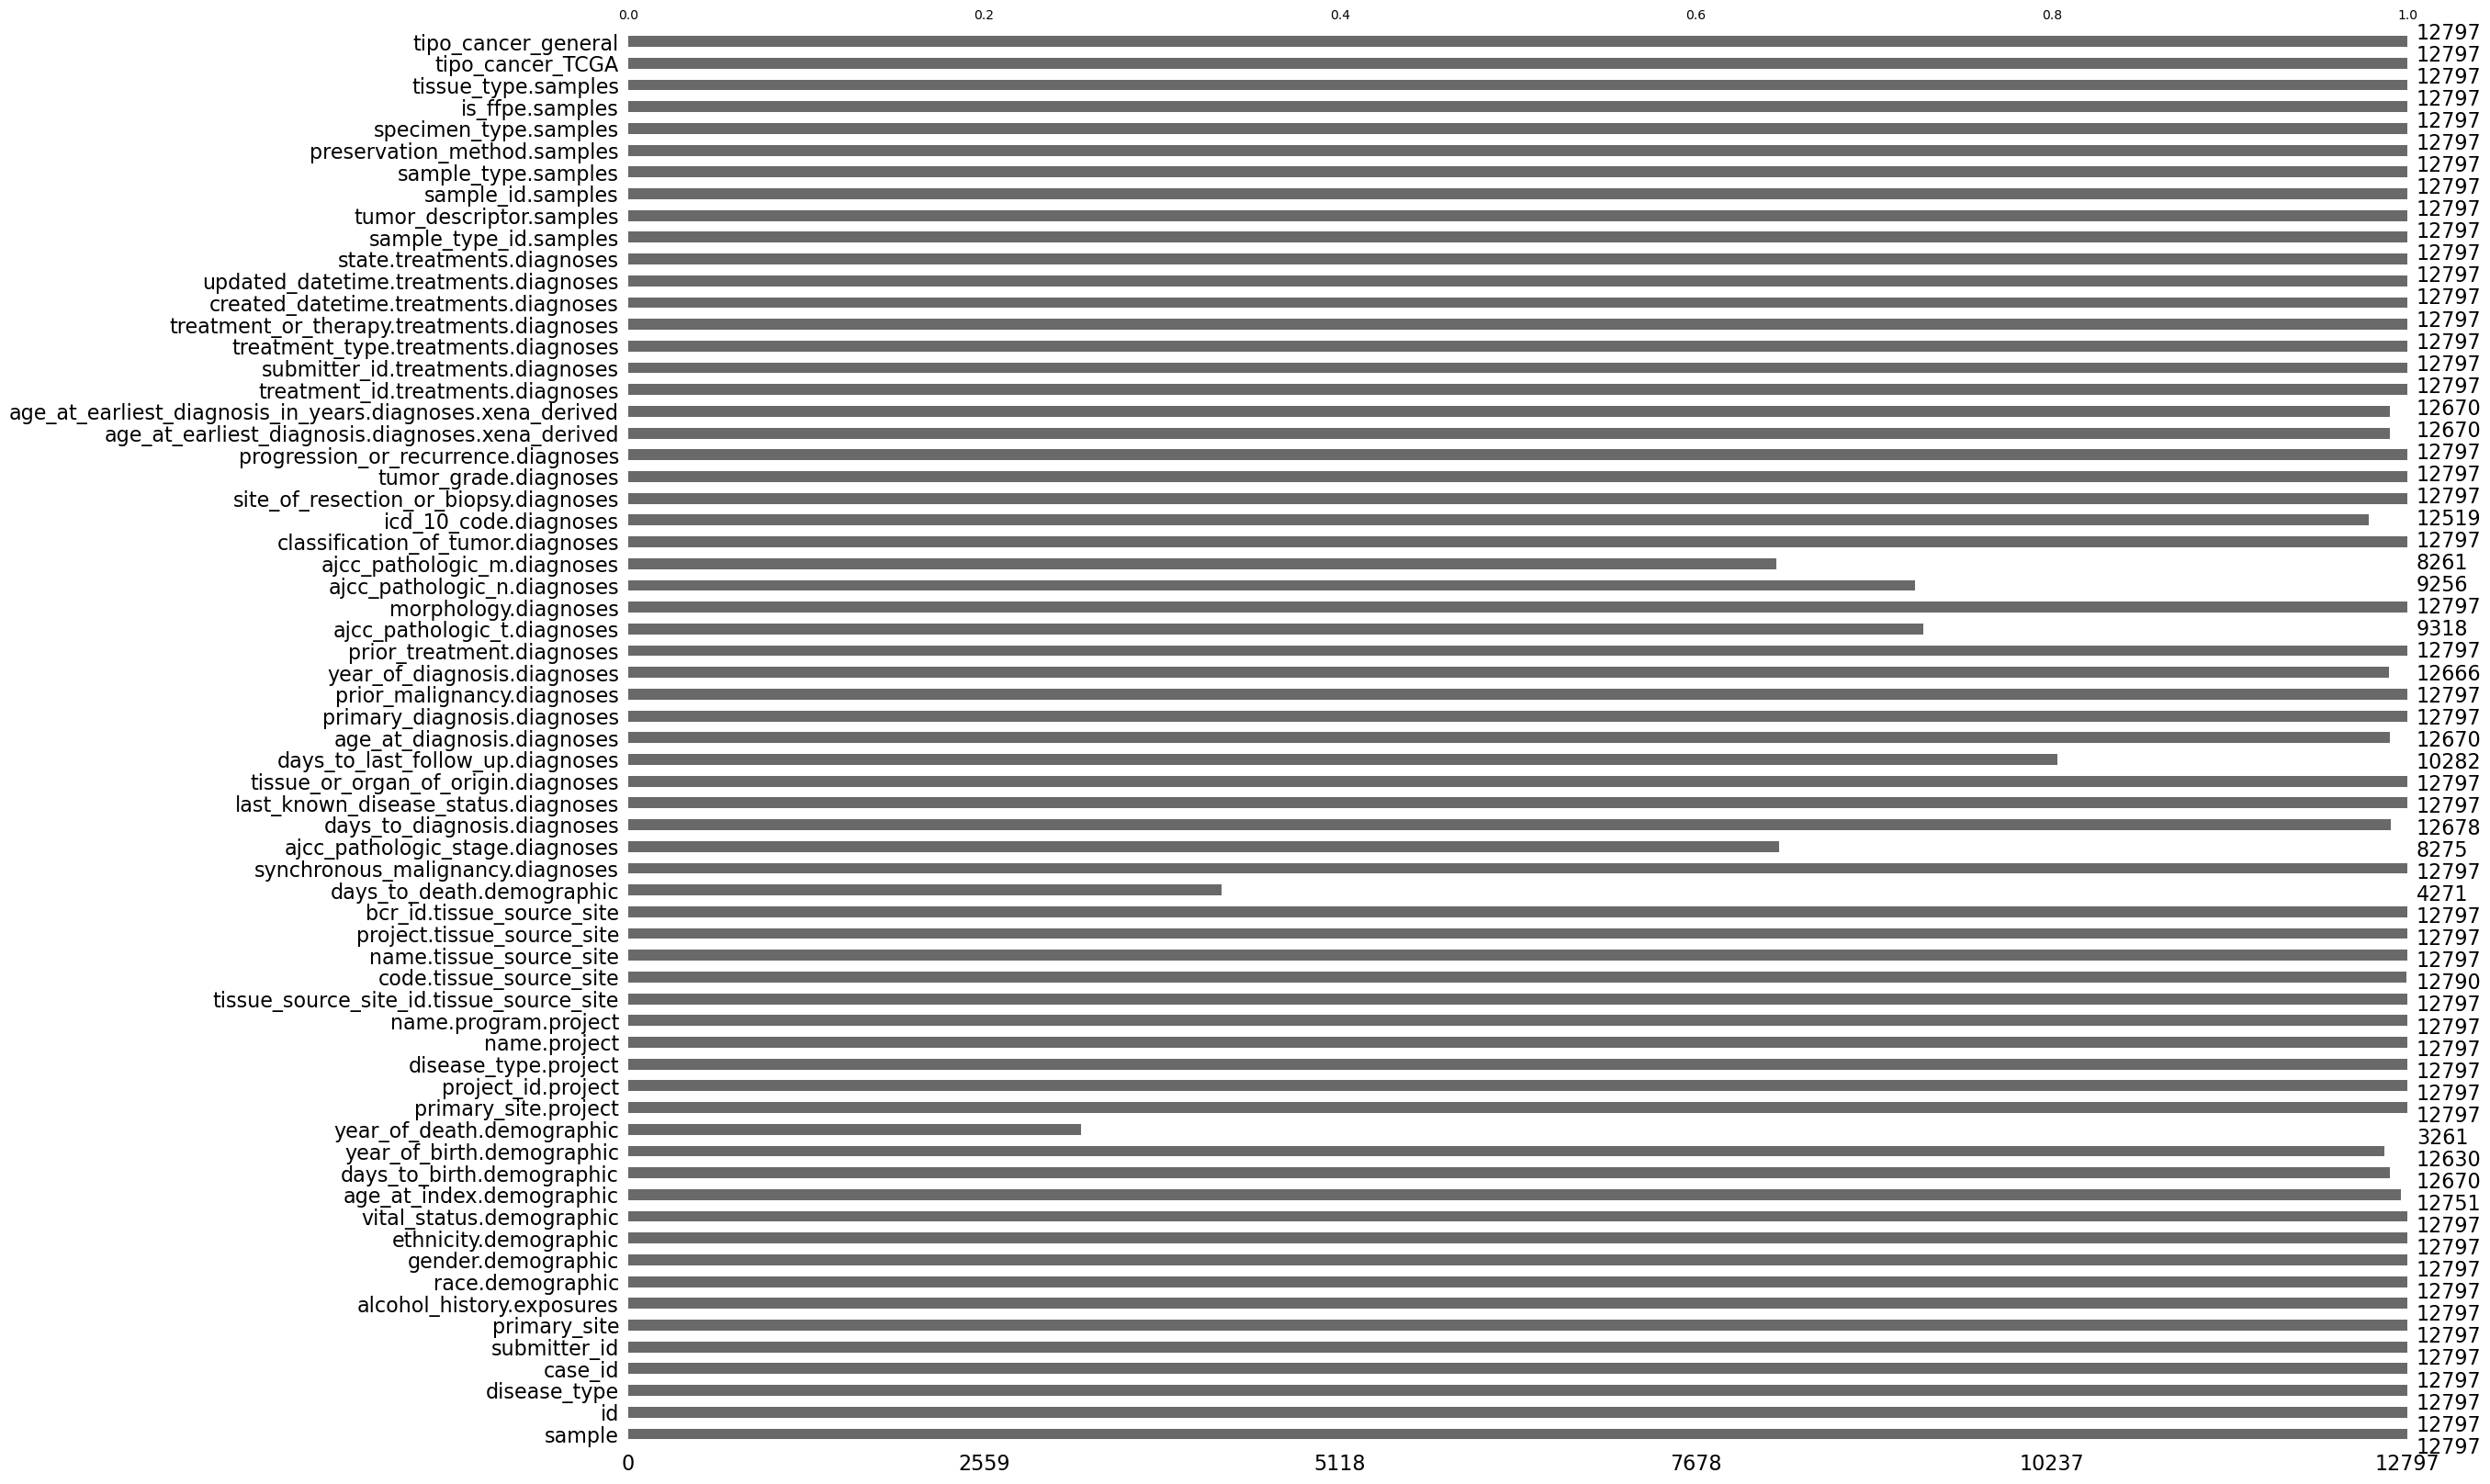

In [18]:
msno.bar(df)
df.isnull().sum().sort_values(ascending=False).head(20)

### Gráfico de barras columnas faltantes
- Columnas como `days_to_death.demographic`, `synchronous_malignancy`, `last_known_disease_status` presentan **altos porcentajes de valores faltantes** (>60%).
- Otras columnas como `submitter_id`, `case_id`, `tipo_cancer_TCGA`, etc., están completamente llenas.

---

#### Recomendaciones

- 🔹 **Eliminar columnas con >80% nulos**, si no son relevantes para el análisis o predicción.
- 🔹 **Imputar categóricas con la moda**, como género, raza, etnicidad.
- 🔹 **Imputar numéricas con mediana o regresión**, dependiendo de la distribución.
- 🔹 **Agrupar imputación de columnas correlacionadas** (basado en el dendrograma).
- 🔹 Considerar `days_to_death` como información censurada en modelos de supervivencia (si los vas a usar).
- 🔹 Fusionar o eliminar columnas altamente correlacionadas o derivadas (como duplicados de edad).


## Tipos de datos y cardinalidad

In [20]:
df.dtypes.value_counts()

object     52
float64    11
int64       1
bool        1
Name: count, dtype: int64

In [22]:
df.dtypes

sample                   object
id                       object
disease_type             object
case_id                  object
submitter_id             object
                          ...  
specimen_type.samples    object
is_ffpe.samples            bool
tissue_type.samples      object
tipo_cancer_TCGA         object
tipo_cancer_general      object
Length: 65, dtype: object

Las columnas tipo object tenemos que convertirlas a categóricas: codificación label encoder o one hot encoder.

In [25]:
df.nunique().sort_values(ascending=False).head(25)

sample                                                       12797
sample_id.samples                                            12797
case_id                                                      11119
submitter_id                                                 11119
updated_datetime.treatments.diagnoses                        11119
created_datetime.treatments.diagnoses                        11119
submitter_id.treatments.diagnoses                            11119
treatment_id.treatments.diagnoses                            11119
id                                                           11119
days_to_birth.demographic                                     8257
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived     8257
age_at_earliest_diagnosis.diagnoses.xena_derived              8257
age_at_diagnosis.diagnoses                                    8257
days_to_last_follow_up.diagnoses                              2798
days_to_death.demographic                                     

In [27]:
n_pacientes = df['case_id'].nunique()
print(f"Número total de pacientes únicos: {n_pacientes}")


Número total de pacientes únicos: 11119


Columnas con cardinalidad máxima (una por fila), son identificadores únicos, no aportan nada al modelo, podemos eliminarlas:
- sample
- sample_id.samples                              
- case_id                                              
- submitter_id                                                       
- submitter_id.treatments.diagnoses                               
- id 

Columnas con muchas categorías, pero útiles:
Fechas o ids de tratamientos, debemos transformarlas:
- updated_datetime.treatments.diagnoses (Fecha): Convertir a `datetime` y luego extraer el año, el mes, o **calcular duración**            
- created_datetime.treatments.diagnoses (Fecha): Igual que la anterior. Se puede comparar ambas para ver **cuánto tiempo tardó** en actualizarse el tratamiento
- treatment_id.treatments.diagnoses (Id): No aporta valor directamente, se puede **contar cuántos tratamientos únicos** tiene un paciente (feature útil)

Variables numéricas continuas, las dejamos igual:
- days_to_birth.demographic                              
- age_at_earliest_diagnosis_in_years.diagnoses.xena_derived  
- age_at_earliest_diagnosis.diagnoses.xena_derived     
- age_at_diagnosis.diagnoses

Todas vienen a decir lo mismo, el centro del que procede la muestra, no sé si nos servirá mucho de estudio...:
- tissue_source_site_id.tissue_source_site 
- code.tissue_source_site
- name.tissue_source_site 

## Estadísticas descriptivas

In [9]:
df.describe(include='all').T

count unique                                   top  \
sample                 12797  12797                      TCGA-B0-5695-01A   
id                     12797  11119  86b165c2-d0e6-4a4f-84ed-aa95e3133627   
disease_type           12797     26          Adenomas and Adenocarcinomas   
case_id                12797  11119  86b165c2-d0e6-4a4f-84ed-aa95e3133627   
submitter_id           12797  11119                          TCGA-92-7340   
...                      ...    ...                                   ...   
specimen_type.samples  12797      3                          Solid Tissue   
is_ffpe.samples        12797      2                                 False   
tissue_type.samples    12797      2                                 Tumor   
tipo_cancer_TCGA       12797     33                                  BRCA   
tipo_cancer_general    12797     29                                 Riñón   

                        freq mean  std  min  25%  50%  75%  max  
sample                     1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
id                         4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
disease_type            5472  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
case_id                    4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
submitter_id               4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                      ...  ...  ...  ...  ...  ...  ...  ...  
specimen_type.samples  10437  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
is_ffpe.samples        12733  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
tissue_type.samples    11379  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
tipo_cancer_TCGA        1254  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
tipo_cancer_general     1407  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[65 rows x 11 columns]

## Distribución de variables numéricas

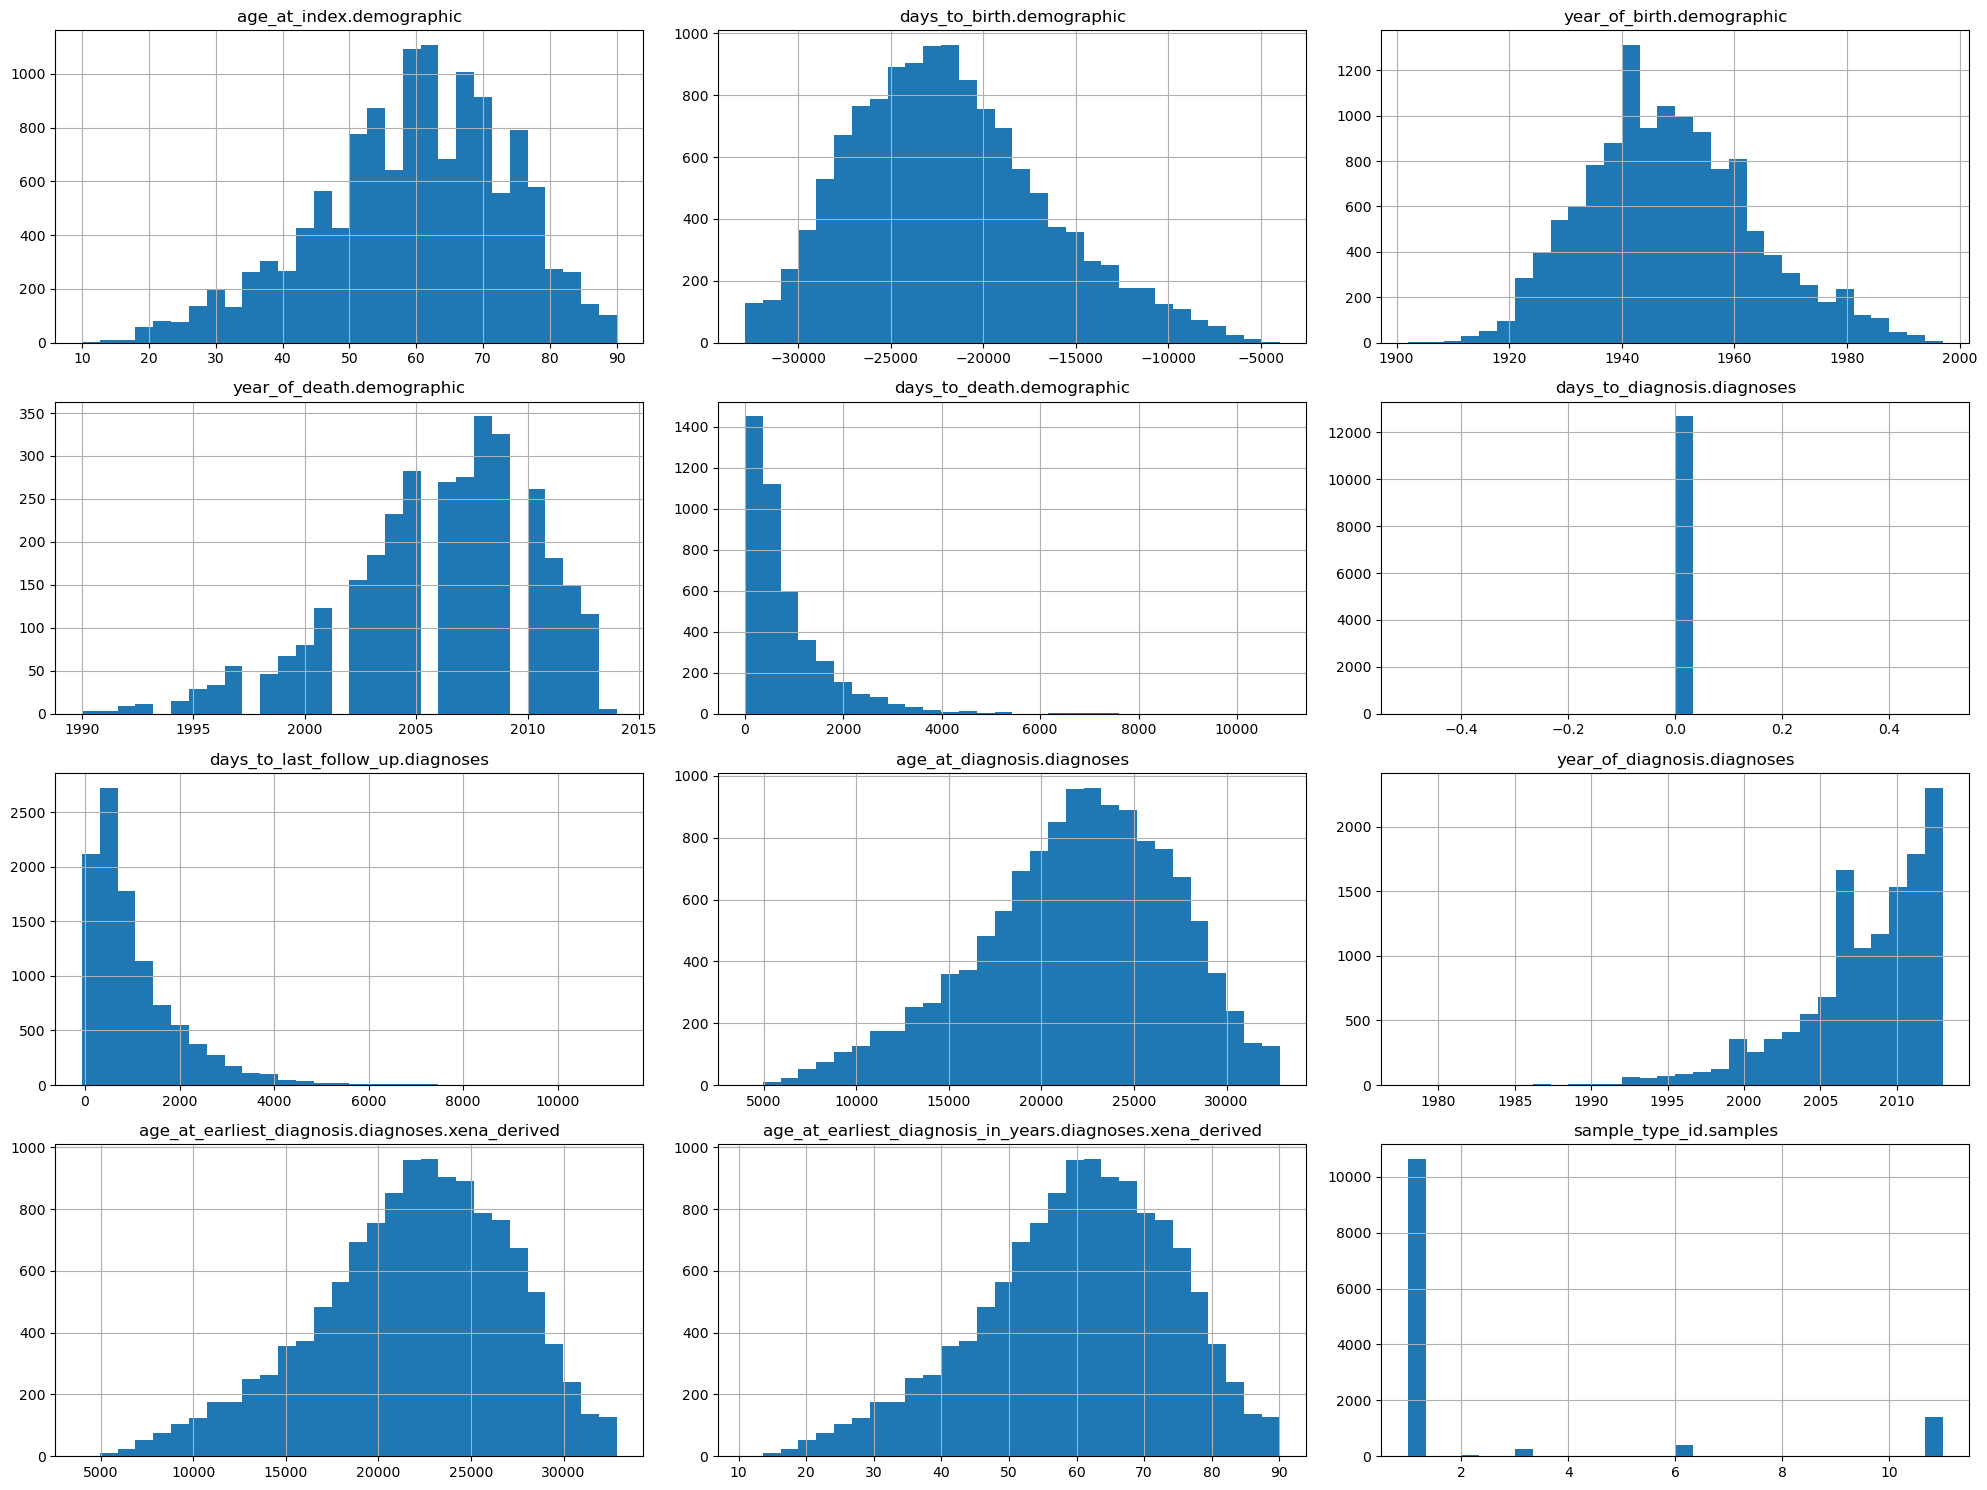

In [26]:
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

## Boxplots para detección de outliers

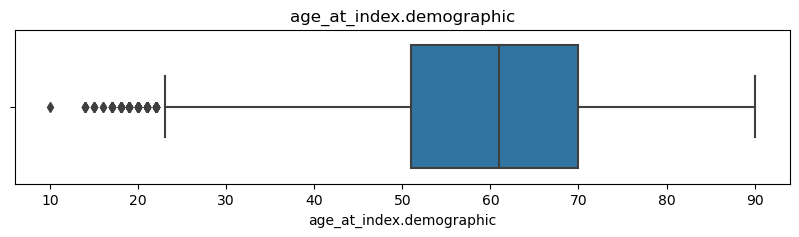

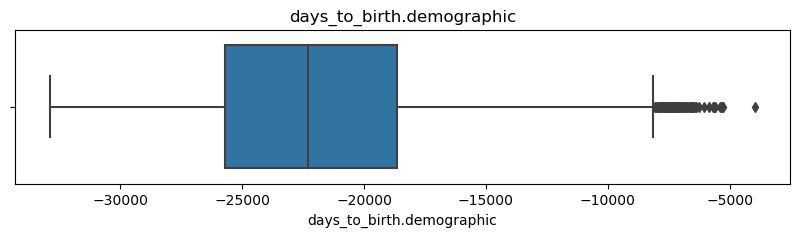

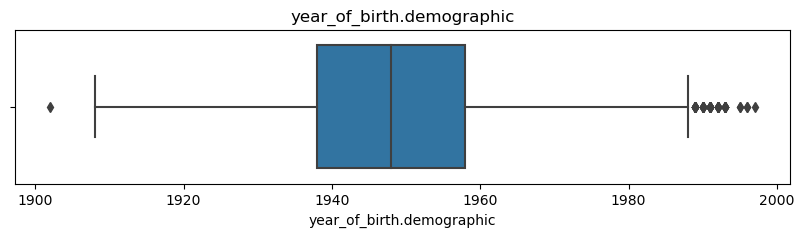

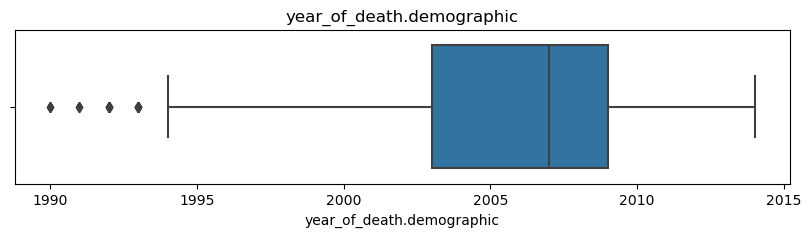

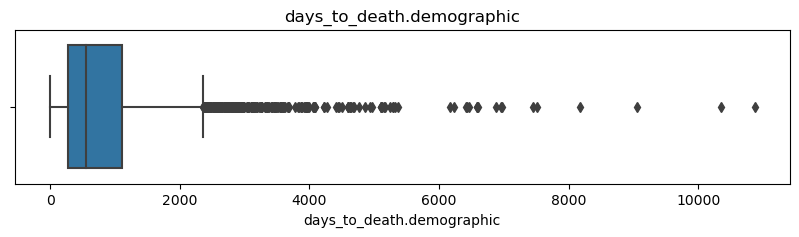

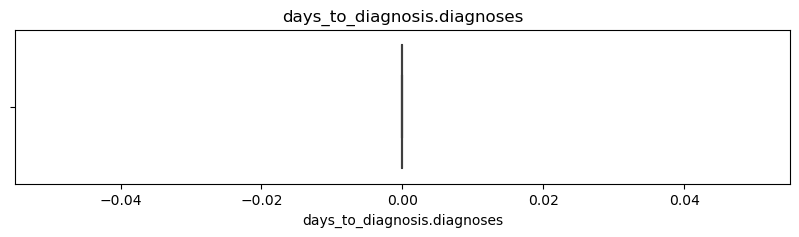

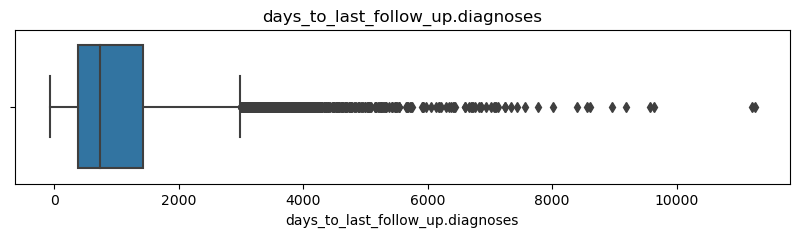

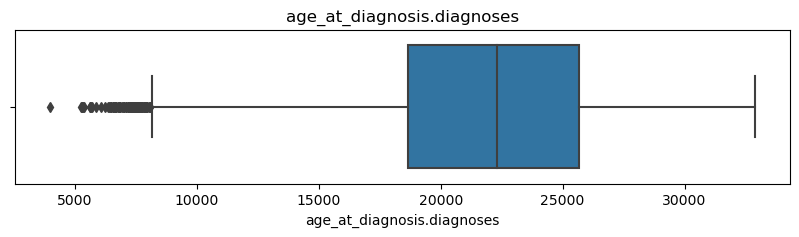

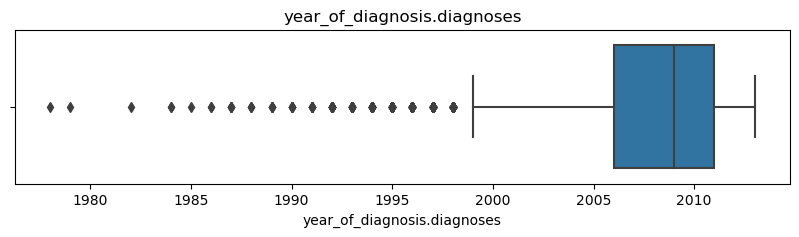

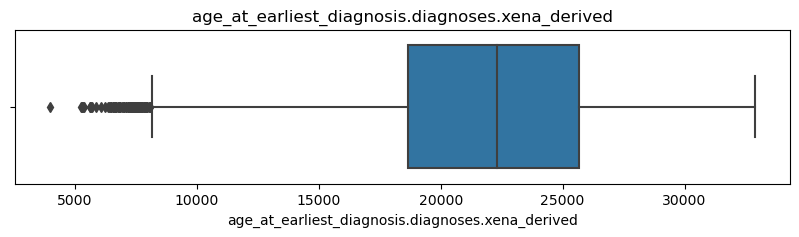

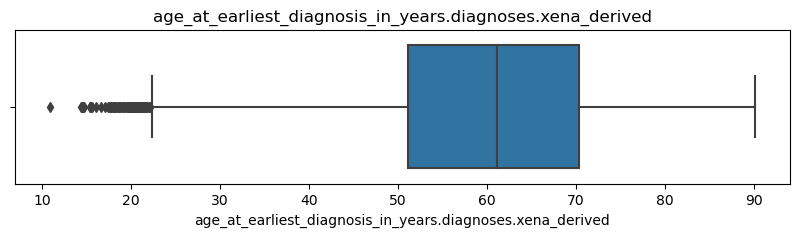

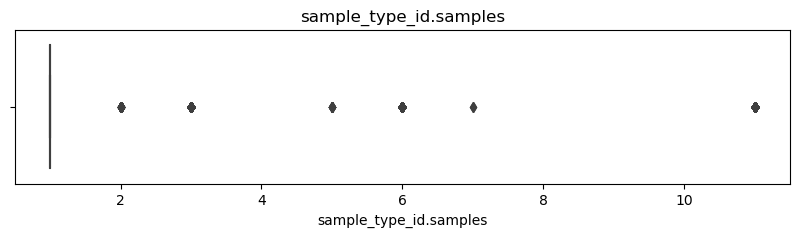

In [11]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Frecuencias de variables categóricas

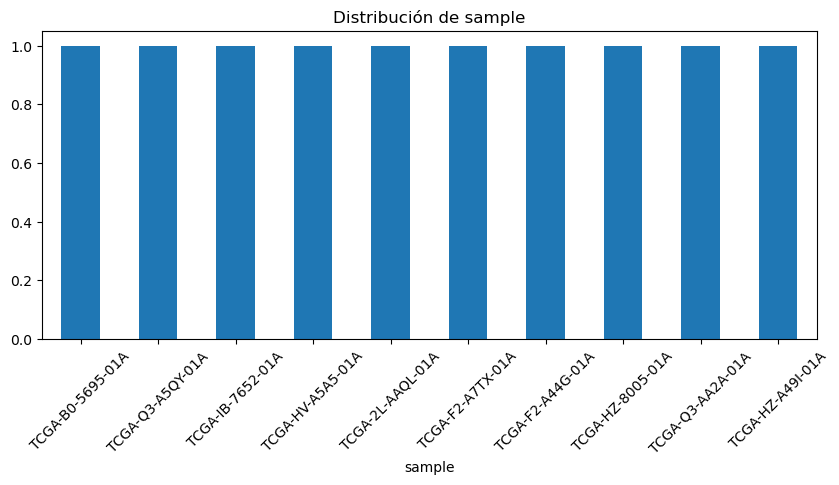

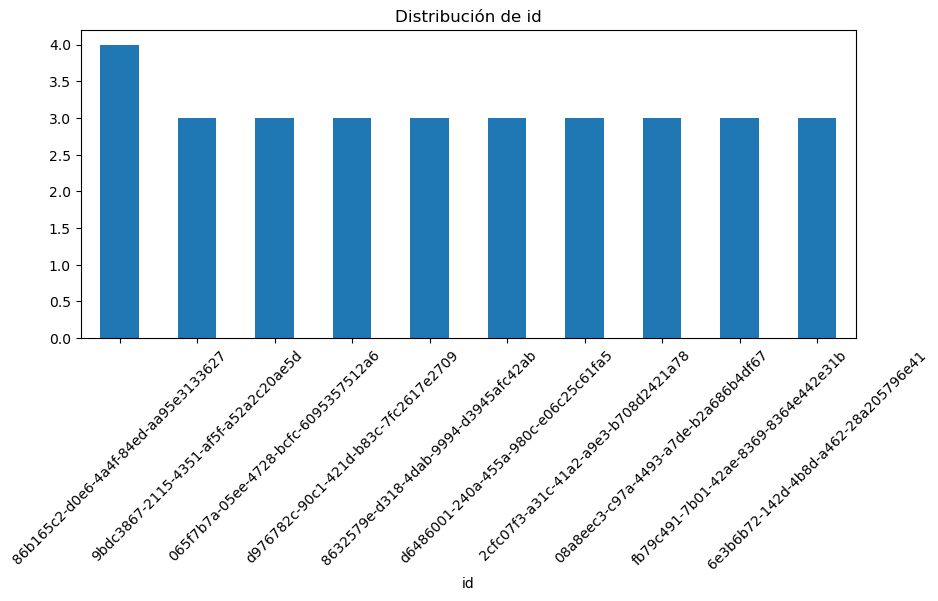

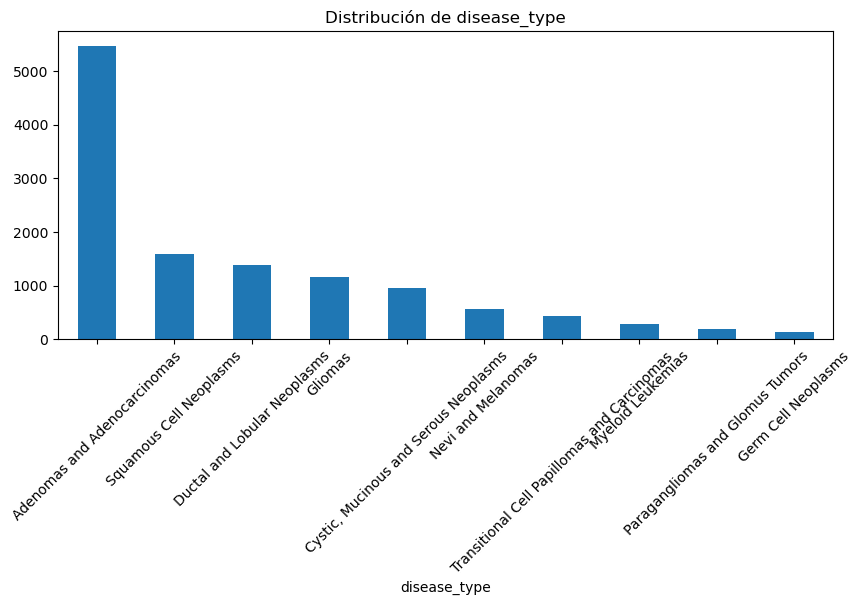

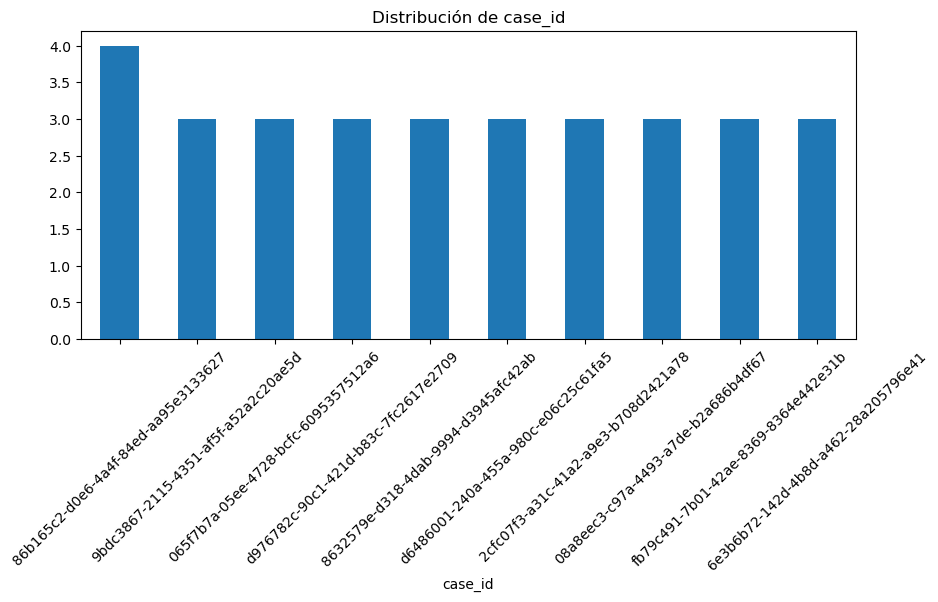

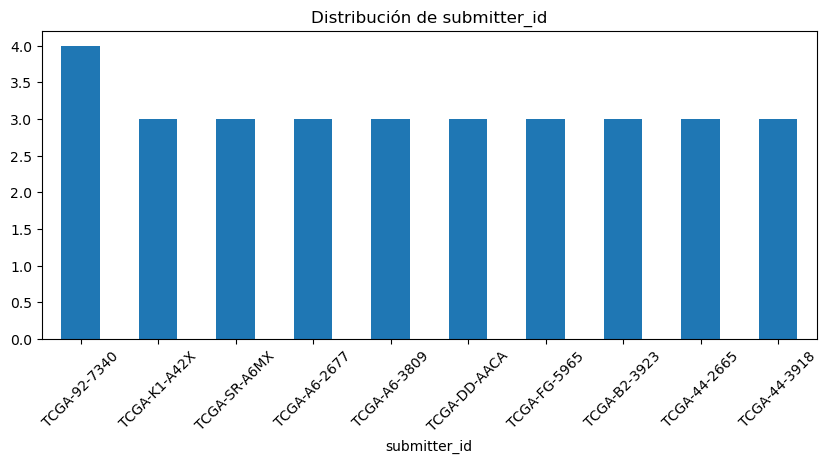

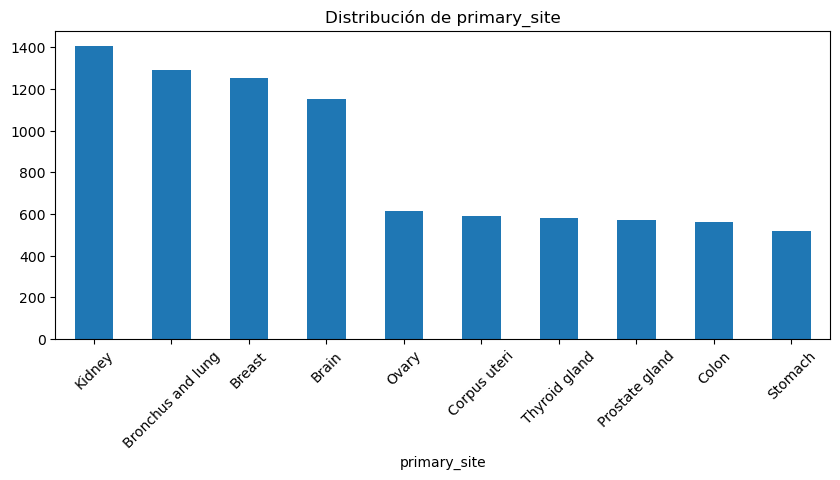

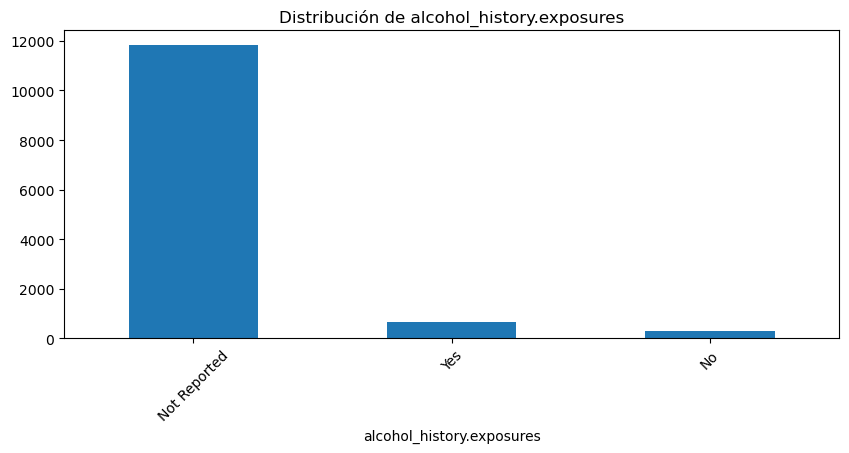

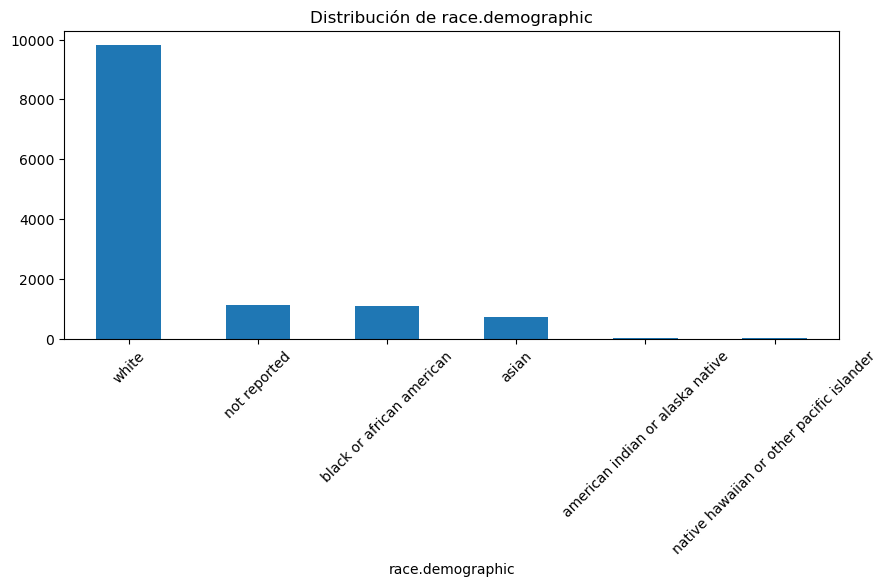

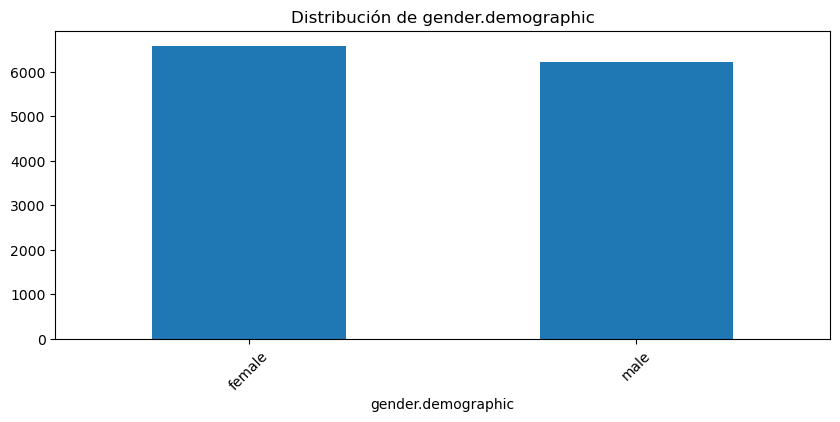

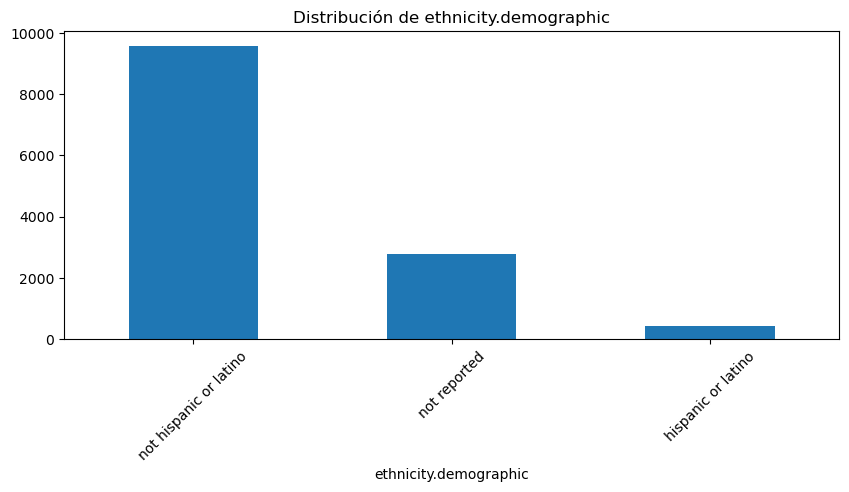

In [12]:
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns[:10]:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

## Correlación entre variables numéricas

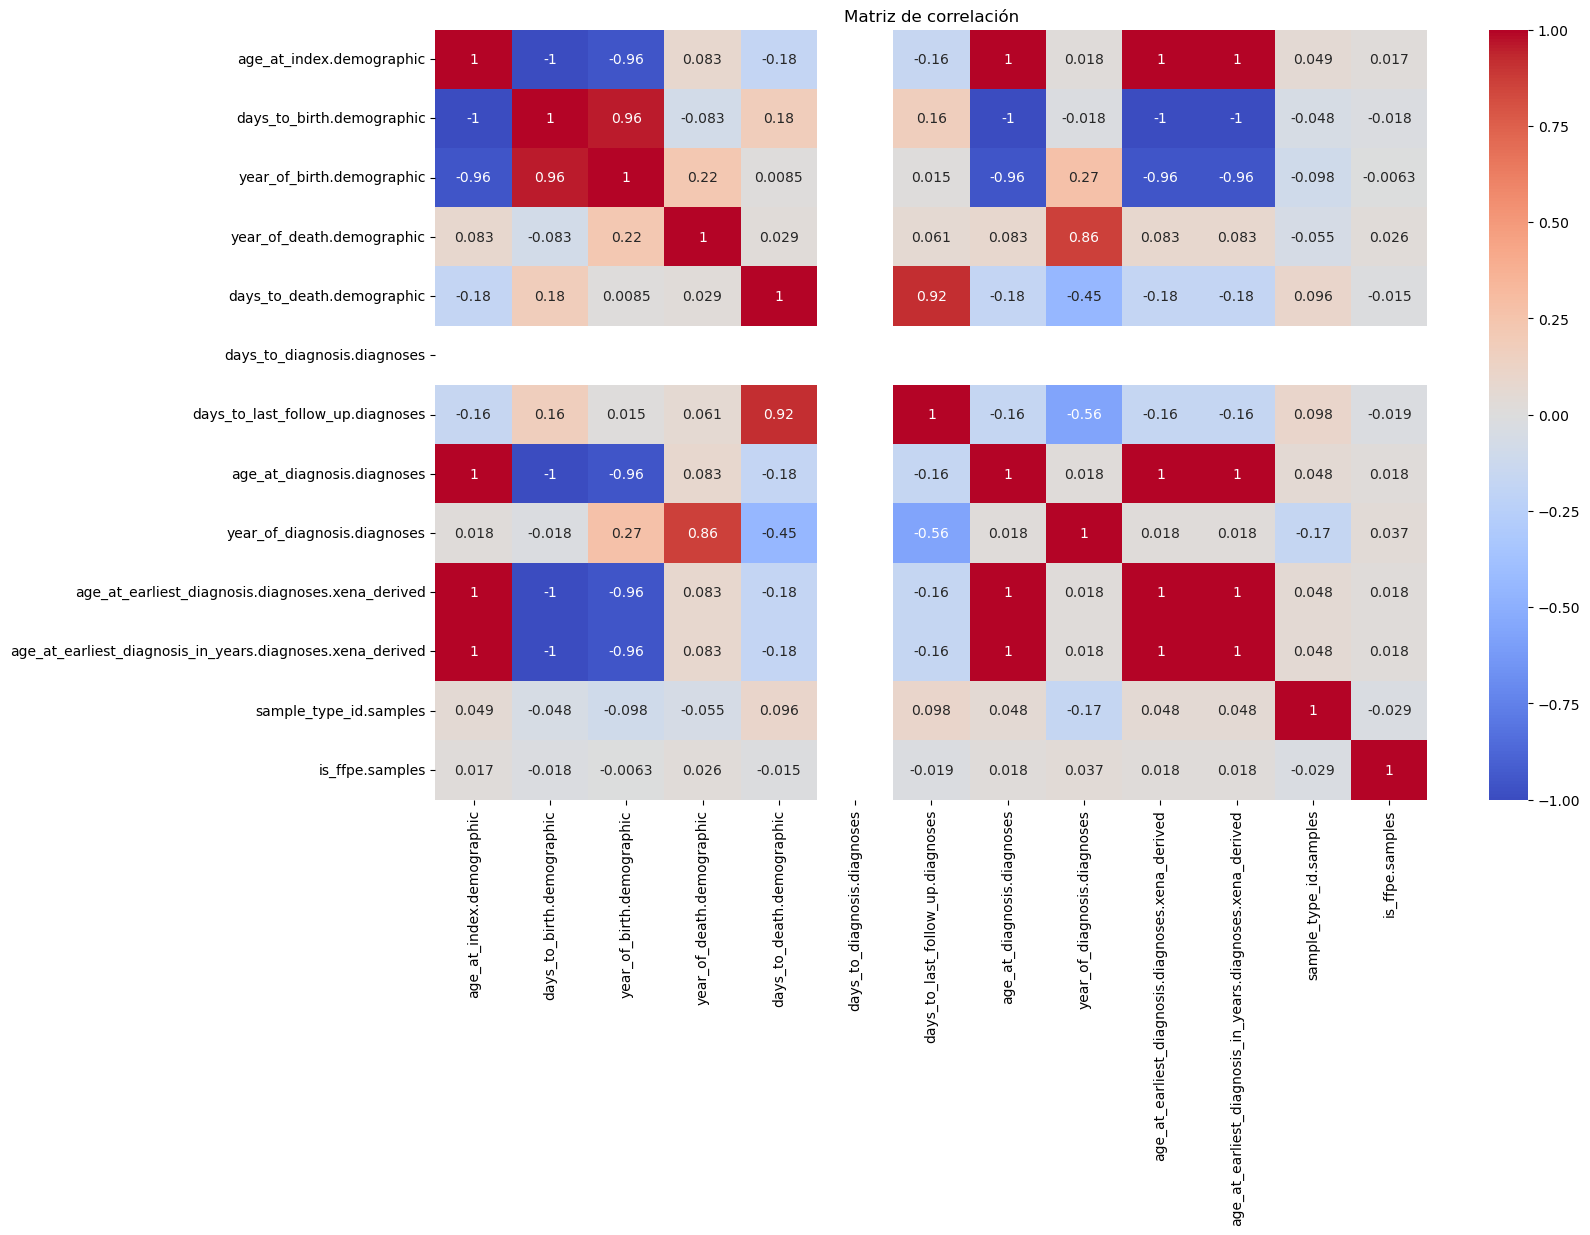

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()

## Relación entre variables categóricas y el tipo de cáncer

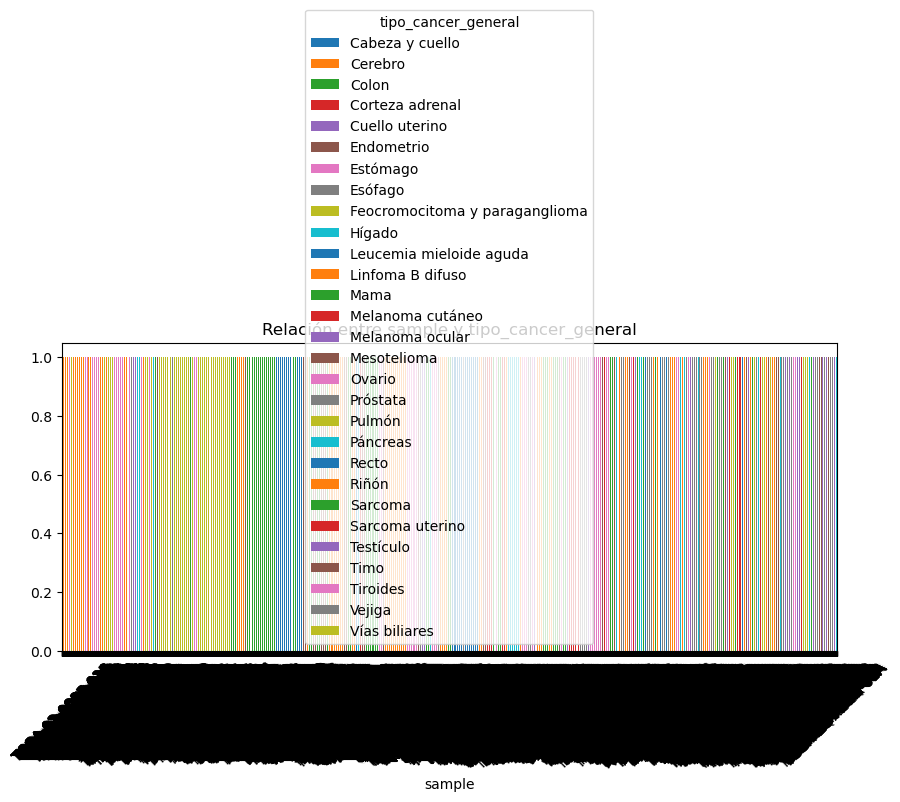

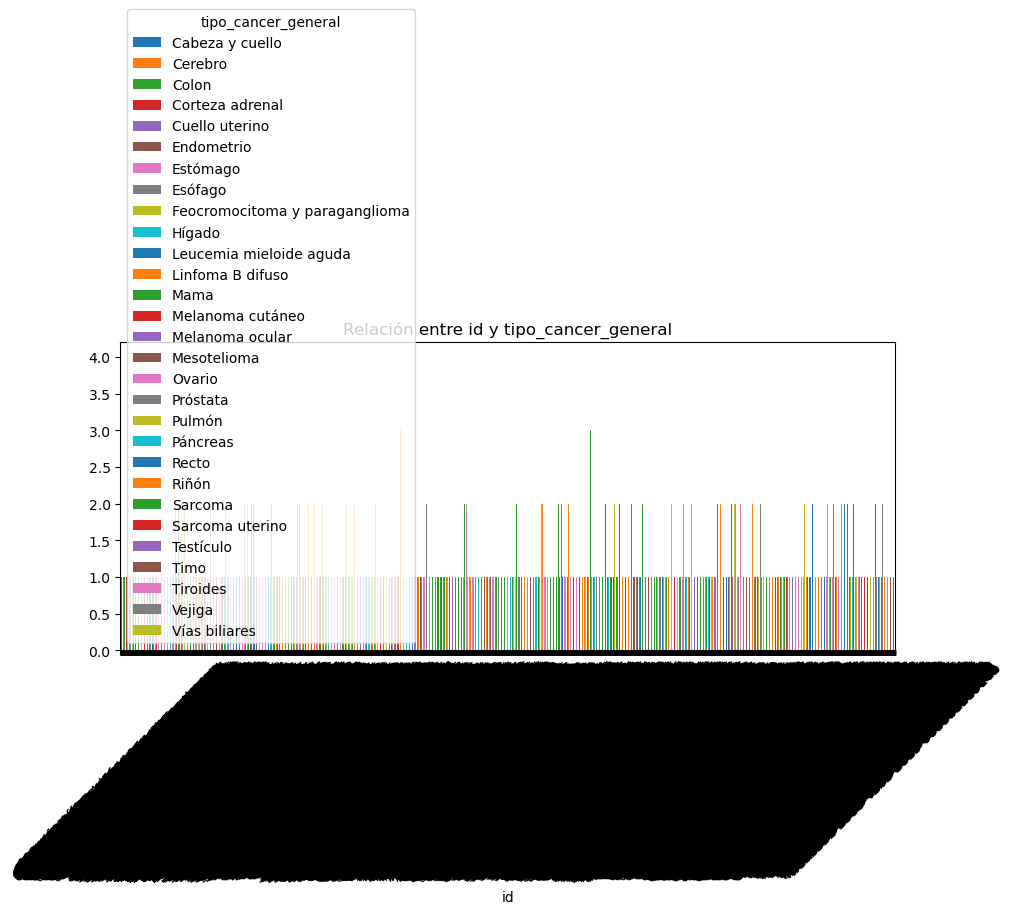

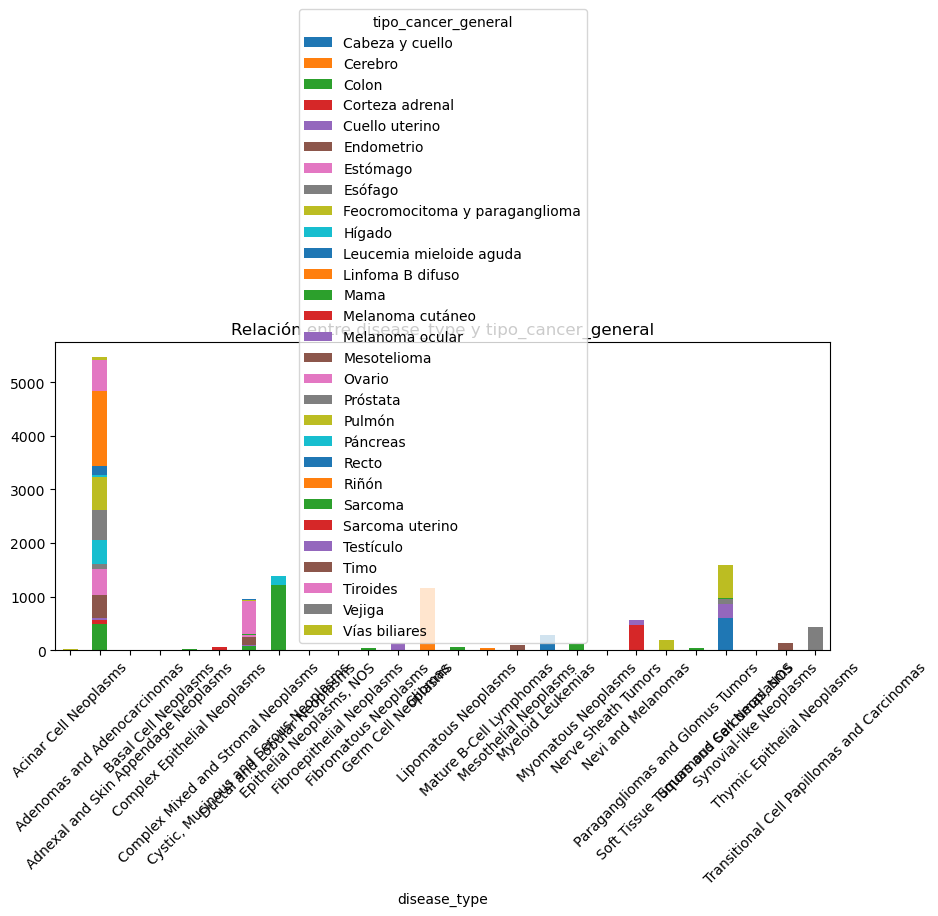

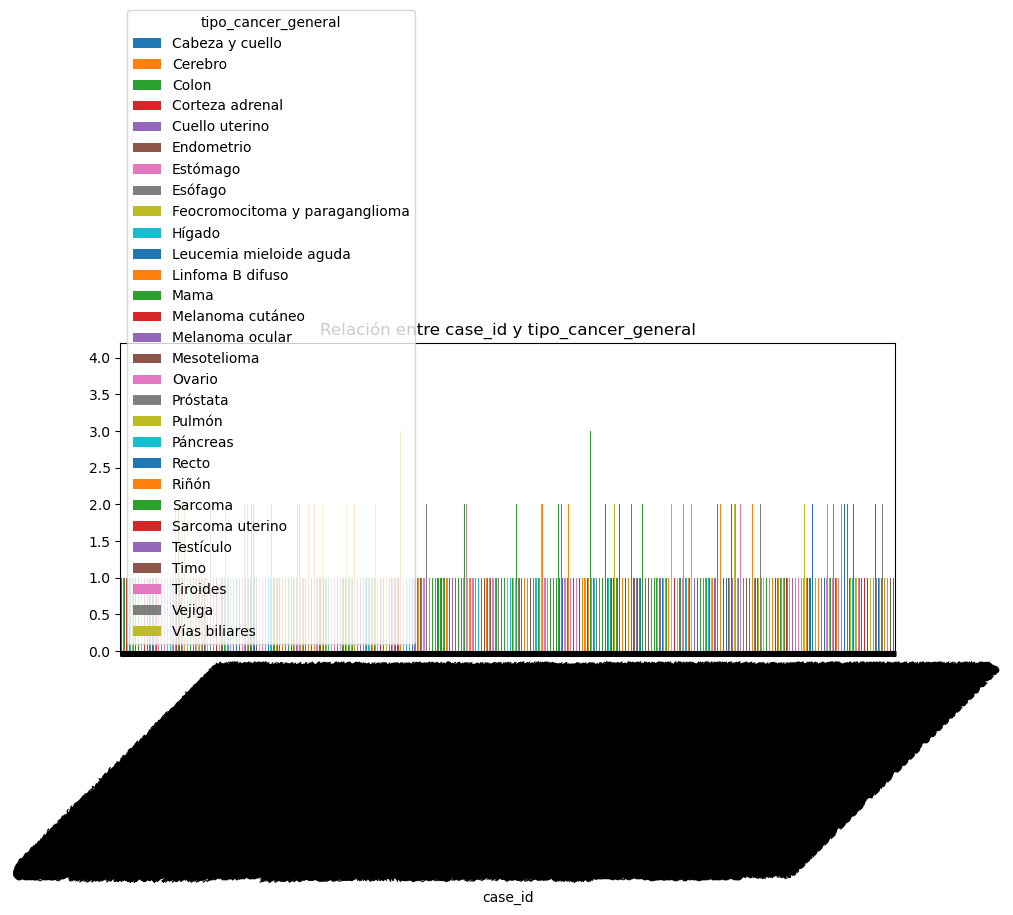

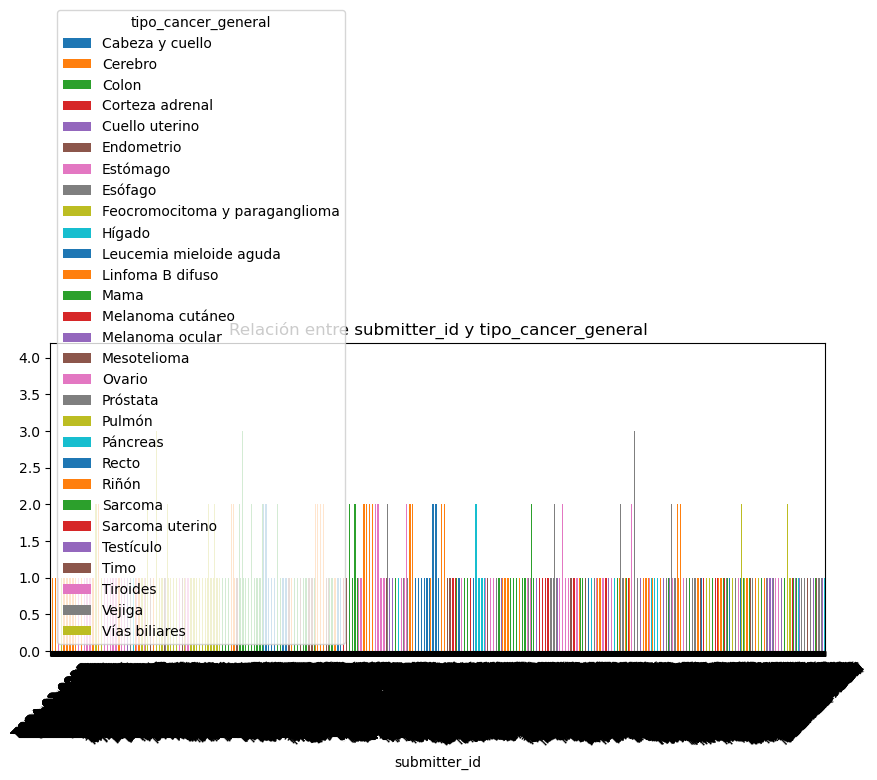

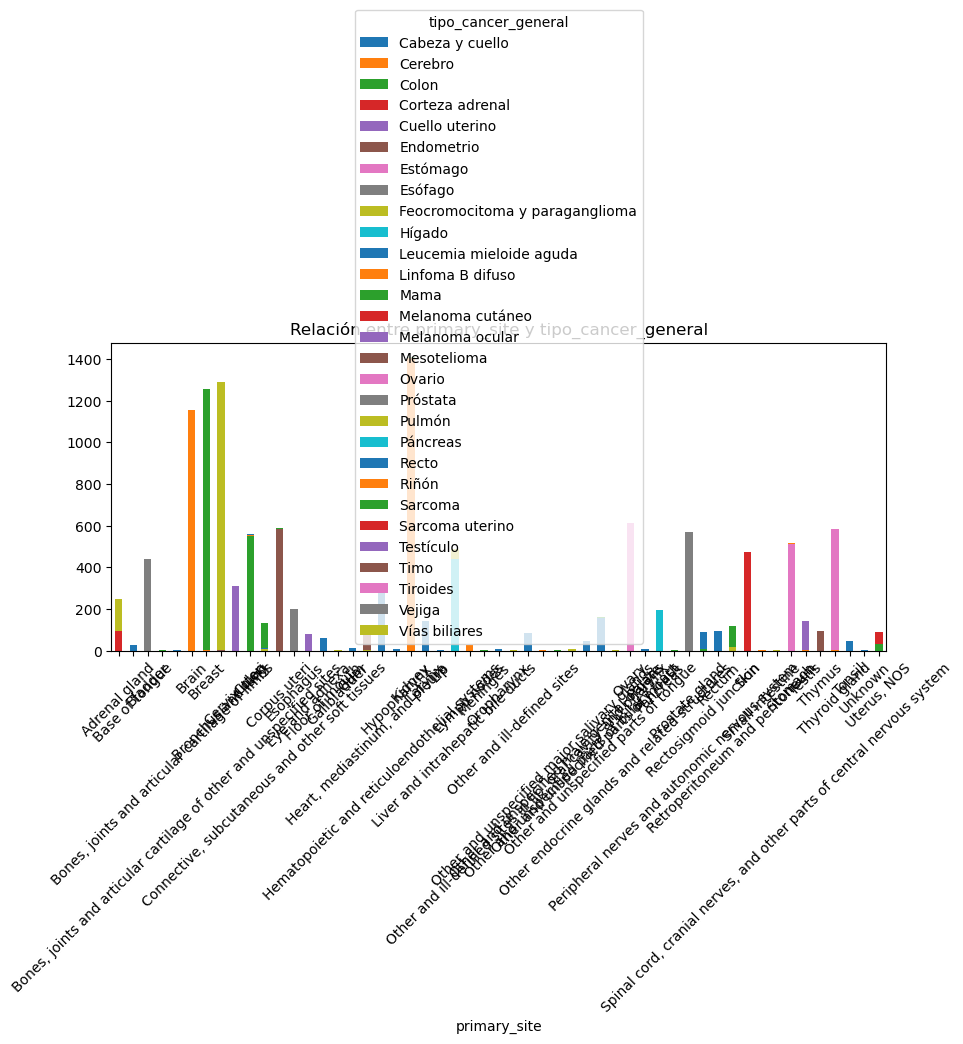

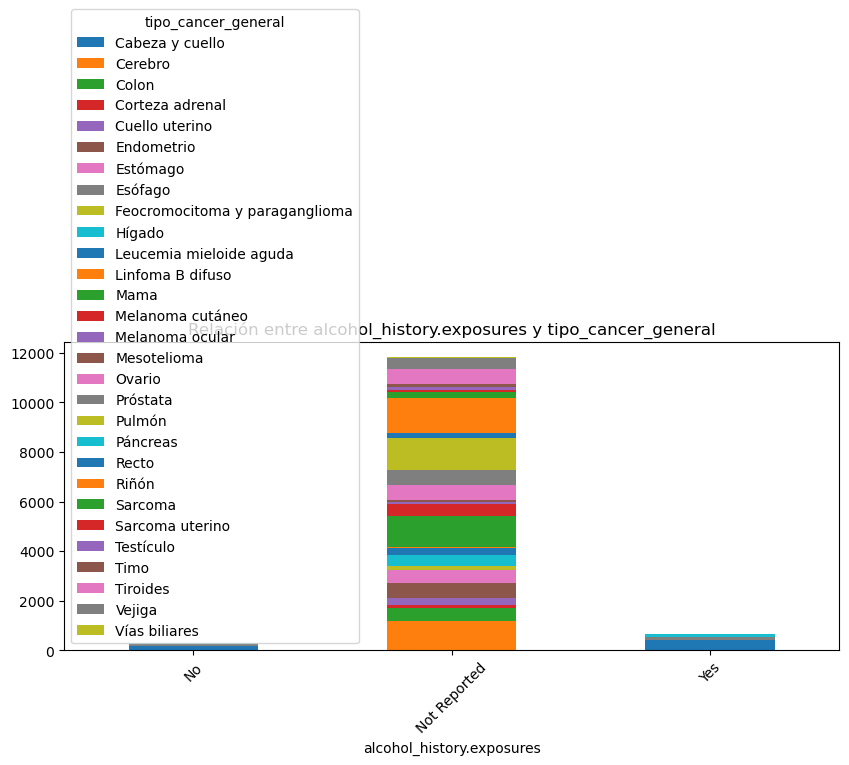

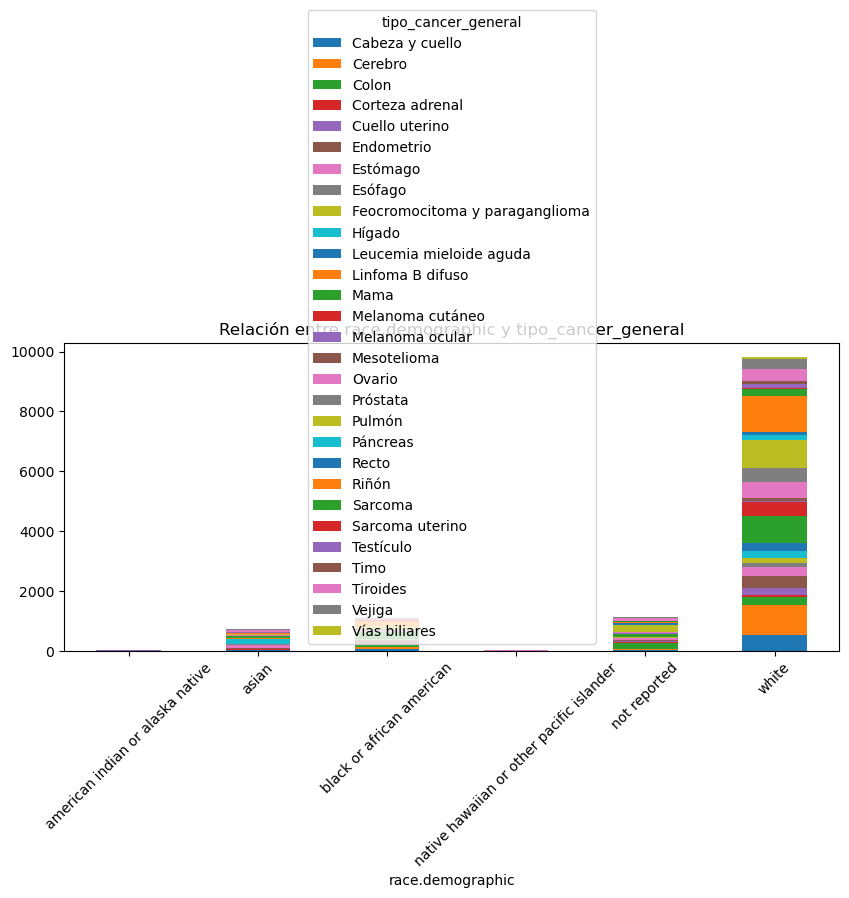

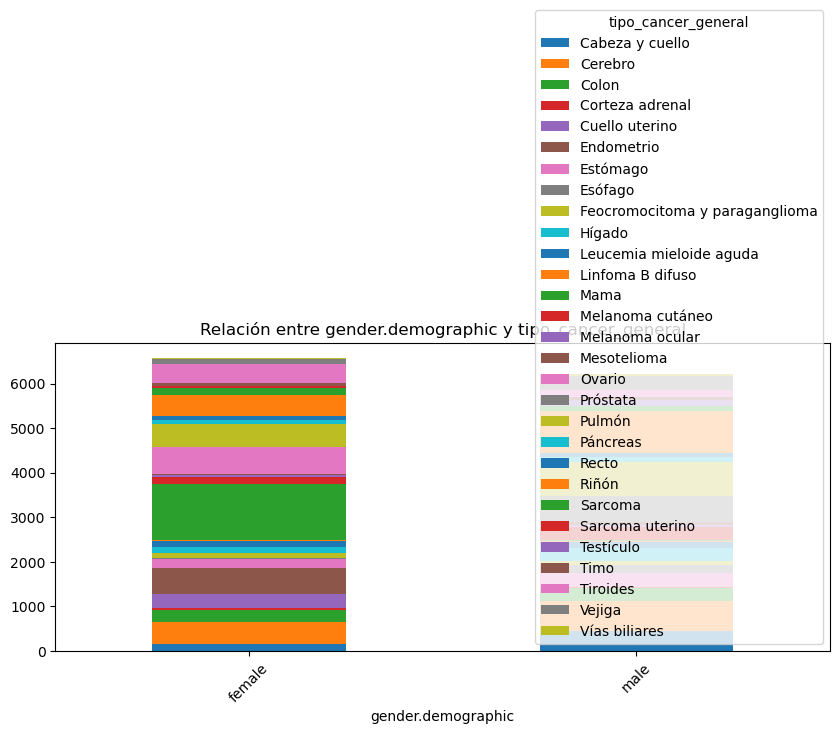

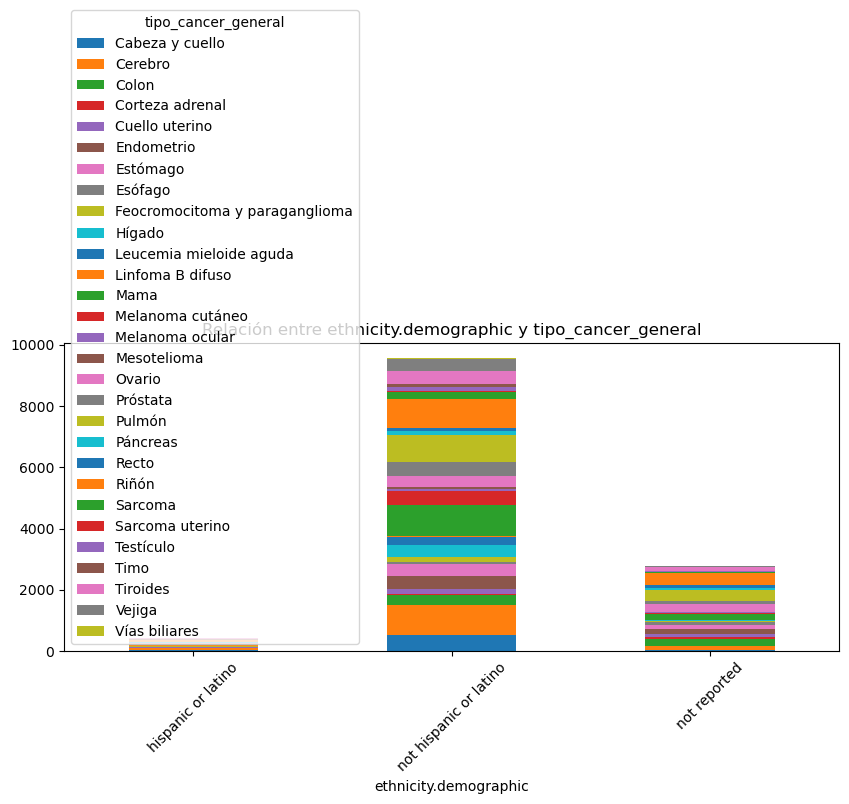

In [14]:
target = 'tipo_cancer_general'
for col in categoricas.columns[:10]:
    if col != target:
        cruzada = pd.crosstab(df[col], df[target])
        cruzada.plot(kind='bar', stacked=True, figsize=(10,4))
        plt.title(f'Relación entre {col} y {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()